# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [9]:
import numpy as np
import pandas as pd

In [10]:
pd.set_option('display.max_columns',None)

In [11]:
df = pd.read_csv('zillow_data copy.csv')
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,329121.0,334059.0,338019.0,346657.0,354457.0,361917.0,369769.0,376112.0,381673.0,386586.0,394154.0,402687.0,412006.0,420541.0,429242.0,436291.0,442139.0,447655.0,452725.0,457455.0,461020.0,465658.0,469811.0,475268.0,478912.0,482464.0,484481.0,488259.0,493127.0,499165.0,503717.0,507932.0,511068.0,514280.0,518252.0,522487.0,527352.0,531284.0,535317.0,539349.0,549450.0,567133.0,588505.0,605851.0,613242.0,617110.0,619549.0,625388.0,631255.0,636089.0,639742.0,643306.0,647193.0,652314.0,659961.0,669842.0,683972.0,696806.0,708743.0,716797.0,728843.0,739511.0,759399.0,771571.0,785979.0,795559.0,805064.0,814587.0,817033.0,832764.0,850933.0,876511.0,901911.0,921178.0,927869.0,922251.0,924475.0,931610.0,934145.0,909286.0,874103.0,840213.0,841253.0,864029.0,878088.0,880955.0,875206.0,881249.0,884836.0,877242.0,872894.0,865069.0,888219.0,909058.0,932691.0,932638.0,933780.0,929386.0,935242.0,949011.0,950769.0,940471.0,901618.0,887671.0,894583.0,898397.0,891086.0,854973.0,823871.0,7

# Step 2: Data Preprocessing

In [12]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[9:], format='%Y-%m')

In [13]:
df.columns = list(df.columns[:9]) + list(get_datetimes(df))

In [14]:
#Only rows within the top states of the northeast US
df = df[df['State'].isin(['NY', 'PA', 'NJ', 'MA', 'CT'])]
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,2000-11-30 00:00:00,2000-12-31 00:00:00,2001-01-31 00:00:00,2001-02-28 00:00:00,2001-03-31 00:00:00,2001-04-30 00:00:00,2001-05-31 00:00:00,2001-06-30 00:00:00,2001-07-31 00:00:00,2001-08-31 00:00:00,2001-09-30 00:00:00,2001-10-31 00:00:00,2001-11-30 00:00:00,2001-12-31 00:00:00,2002-01-31 00:00:00,2002-02-28 00:00:00,2002-03-31 00:00:00,2002-04-30 00:00:00,2002-05-31 00:00:00,2002-06-30 00:00:00,2002-07-31 00:00:00,2002-08-31 00:00:00,2002-09-30 00:00:00,2002-10-31 00:00:00,2002-11-30 00:00:00,2002-12-31 00:00:00,2003-01-31 00:00:00,2003-02-28 00:00:00,2003-03-31 00:00:00,2003-04-30 00:00:00,2003-05-31 00:00:00,2003-06-30 00:00:00,2003-07-31 00:00:00,2003-08-31 00:00:00,2003-09-30 00:00:00,2003-10-31 00:00:00,2003-11-30 00:00:00,2003-12-31 00:00:00,2004-01-31 00:00:00,2004-02-29 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,2004-06-30 00:00:00,2004-07-31 00:00:00,2004-08-31 00:00:00,2004-09-30 00:00:00,2004-10-31 00:00:00,2004-11-30 00:00:00,2004-12-31 00:00:00,2005-01-31 00:00:00,2005-02-28 00:00:00,2005-03-31 00:00:00,2005-04-30 00:00:00,2005-05-31 00:00:00,2005-06-30 00:00:00,2005-07-31 00:00:00,2005-08-31 00:00:00,2005-09-30 00:00:00,2005-10-31 00:00:00,2005-11-30 00:00:00,2005-12-31 00:00:00,2006-01-31 00:00:00,2006-02-28 00:00:00,2006-03-31 00:00:00,2006-04-30 00:00:00,2006-05-31 00:00:00,2006-06-30 00:00:00,2006-07-31 00:00:00,2006-08-31 00:00:00,2006-09-30 00:00:00,2006-10-31 00:00:00,2006-11-30 00:00:00,2006-12-31 00:00:00,2007-01-31 00:00:00,2007-02-28 00:00:00,2007-03-31 00:00:00,2007-04-30 00:00:00,2007-05-31 00:00:00,2007-06-30 00:00:00,2007-07-31 00:00:00,2007-08-31 00:00:00,2007-09-30 00:00:00,2007-10-31 00:00:00,2007-11-30 00:00:00,2007-12-31 00:00:00,2008-01-31 00:00:00,2008-02-29 00:00:00,2008-03-31 00:00:00,2008-04-30 00:00:00,2008-05-31 00:00:00,2008-06-30 00:00:00,2008-07-31 00:00:00,2008-08-31 00:00:00,2008-09-30 00:00:00,2008-10-31 00:00:00,2008-11-30 00:00:00,2008-12-31 00:00:00,2009-01-31 00:00:00,2009-02-28 00:00:00,2009-03-31 00:00:00,2009-04-30 00:00:00,2009-05-31 00:00:00,2009-06-30 00:00:00,2009-07-31 00:00:00,2009-08-31 00:00:00,2009-09-30 00:00:00,2009-10-31 00:00:00,2009-11-30 00:00:00,2009-12-31 00:00:00,2010-01-31 00:00:00,2010-02-28 00:00:00,2010-03-31 00:00:00,2010-04-30 00:00:00,2010-05-31 00:00:00,2010-06-30 00:00:00,2010-07-31 00:00:00,2010-08-31 00:00:00,2010-09-30 00:00:00,2010-10-31 00:00:00,2010-11-30 00:00:00,2010-12-31 00:00:00,2011-01-31 00:00:00,2011-02-28 00:00:00,2011-03-31 00:00:00,2011-04-30 00:00:00,2011-05-31 00:00:00,2011-06-30 00:00:00,2011-07-31 00:00:00,2011-08-31 00:00:00,2011-09-30 00:00:00,2011-10-31 00:00:00,2011-11-30 00:00:00,2011-12-31 00:00:00,2012-01-31 00:00:00,2012-02-29 00:00:00,2012-03-31 00:00:00,2012-04-30 00:00:00,2012-05-31 00:00:00,2012-06-30 00:00:00,2012-07-31 00:00:00,2012-08-31 00:00:00,2012-09-30 00:00:00,2012-10-31 00:00:00,2012-11-30 00:00:00,2012-12-31 00:00:00,2013-01-31 00:00:00,2013-02-28 00:00:00,2013-03-31 00:00:00,2013-04-30 00:00:00,2013-05-31 00:00:00,2013-06-30 00:00:00,2013-07-31 00:00:00,2013-08-31 00:00:00,2013-09-30 00:00:00,2013-10-31 00:00:00,2013-11-30 00:00:00,2013-12-31 00:00:00,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-09-30 00:00:00,2014-10-31 00:00:00,2014-11-30 00:00:00,2014-12-31 00:00:00,2015-01-31 00:00:00,2015-02-28 00:00:00,2015-03-31 00:00:00,2015-04-30 00:00:00,2015-05-31 00:00:00,2015-06-30 00:00:00,2015-07-31 00:00:00,2015-08-31 00:00:00,2015-09-30 00:00:00,2015-10-31 00:00:00,2015-11-30 00:00:00,2015-12-31 00:00:00,2016-01-31 00:00:00,2016-02-29 00:00:00,2016-03-31 00:00:00,2016-04-30 00:00:00,2

In [15]:
#grouping the columns by years and their average price
c = df.columns.tolist()
cols = c[:9] 
cols.append(c[-1]) 
print (cols)

#set to index all NOT date columns
tdf = df.set_index(df.columns.tolist()[:9])
tdf.columns = pd.to_datetime(tdf.columns).to_period('M')

# find the columns in the period 2000-2021
cols = tdf.columns
sel_cols = cols[(cols > '2000-01') & (cols < '2022')]
print (sel_cols)


#change format columns
a = tdf[sel_cols].rename(columns=lambda x: '{:}'.format(x.year, [1]))
print (a.columns)

#groupby by a with new format
mdf = a.groupby(a.columns, axis=1).mean().reset_index()

['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName', Timestamp('2021-08-31 00:00:00')]
PeriodIndex(['2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07',
             '2000-08', '2000-09', '2000-10', '2000-11',
             ...
             '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04',
             '2021-05', '2021-06', '2021-07', '2021-08'],
            dtype='period[M]', length=259, freq='M')
Index(['2000', '2000', '2000', '2000', '2000', '2000', '2000', '2000', '2000',
       '2000',
       ...
       '2020', '2020', '2021', '2021', '2021', '2021', '2021', '2021', '2021',
       '2021'],
      dtype='object', length=259)


In [16]:
mdf

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,3.678264e+05,4.474842e+05,5.003453e+05,5.766275e+05,6.655017e+05,7.981462e+05,8.993602e+05,8.898454e+05,9.139156e+05,7.592758e+05,7.098839e+05,7.404455e+05,7.531898e+05,8.036307e+05,9.132885e+05,9.817538e+05,1.039384e+06,1.039147e+06,1.057255e+06,1.086893e+06,1.051246e+06,1114518.875
1,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,5.412720e+05,6.368342e+05,7.164314e+05,8.093142e+05,9.159251e+05,1.078528e+06,1.206610e+06,1.207426e+06,1.272393e+06,1.021550e+06,9.388490e+05,9.973832e+05,1.034857e+06,1.103962e+06,1.243271e+06,1.321928e+06,1.392055e+06,1.422695e+06,1.505360e+06,1.419982e+06,1.471571e+06,1456762.750
2,61616,6,10002,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,4.390963e+05,4.981035e+05,5.867457e+05,6.739983e+05,7.694815e+05,8.964938e+05,1.019136e+06,1.001938e+06,9.936774e+05,8.512638e+05,7.877474e+05,8.277897e+05,8.437419e+05,9.052522e+05,9.944523e+05,1.074337e+06,1.040234e+06,9.663266e+05,9.109255e+05,1.007627e+06,1.021829e+06,877680.000
3,62037,10,11226,Zip,NY,NY,New York,New York-Newark-Jersey City,Kings County,2.769971e+05,3.072078e+05,3.166082e+05,3.576202e+05,3.708218e+05,4.504902e+05,5.297782e+05,5.752878e+05,5.702421e+05,5.081583e+05,4.870558e+05,4.787322e+05,4.937723e+05,5.175646e+05,5.634913e+05,6.401825e+05,6.948982e+05,7.483428e+05,7.768873e+05,8.241271e+05,7.924181e+05,802142.625
4,61807,11,10467,Zip,NY,NY,New York,New York-Newark-Jersey City,Bronx County,1.656854e+05,1.806235e+05,1.979929e+05,2.116946e+05,2.332073e+05,2.750774e+05,3.170824e+05,3.465273e+05,3.390513e+05,2.927356e+05,2.813925e+05,2.750082e+05,2.704657e+05,2.781789e+05,2.906831e+05,3.086776e+05,3.177903e+05,3.493210e+05,3.882428e+05,4.227451e+05,4.432446e+05,465834.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4879,64902,34430,17071,Zip,PA,PA,Toboyne Township,Harrisburg-Carlisle,Perry County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.188867e+04,5.432675e+04,4.610108e+04,3.905975e+04,3.666275e+04,3.802383e+04,4.226117e+04,42183.625
4880,58866,34430,2714,Zip,MA,MA,Dartmouth,Providence-Warwick,Bristol County,2.413250e+05,2.708868e+05,3.048658e+05,3.660697e+05,4.116116e+05,4.457942e+05,4.172499e+05,3.995207e+05,3.849799e+05,3.592264e+05,3.462120e+05,3.320158e+05,3.267219e+05,3.534039e+05,3.587868e+05,3.596182e+05,3.631648e+05,3.880512e+05,4.160485e+05,4.176426e+05,4.193243e+05,477998.500
4881,60758,34430,7703,Zip,NJ,NJ,Eatontown,New York-Newark-Jersey City,Monmouth County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.157622e+05,3.749380e+05,3.943588e+05,4.296441e+05,482937.500
4882,61694,34430,10118,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1.786919e+06,1.918566e+06,2.074695e+06,2.345099e+06,2.610042e+06,3.313463e+06,3.737723e+06,3.604086e+06,2.934010e+06,2.635148e+06,2.579003e+06,2.675010e+06,2.429398e+06,2.606464e+06,2.767807e+06,3.038068e+06,3.009727e+06,2.981725e+06,2.745202e+06,2.252912e+06,2.200593e+06,2017766.250


In [17]:
#returns from 2000 to 2021
mdf['average_annual_return'] = (((mdf['2021']-mdf['2000'])/mdf['2000'])*100)

In [18]:
#average rate per year
mdf['rate_year']=mdf['average_annual_return']/21

In [19]:
#getting the top five
top_five = mdf.sort_values(by='rate_year', ascending=False).head(5)
top_five

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,average_annual_return,rate_year
2855,58807,16737,2558,Zip,MA,MA,Wareham,Boston-Cambridge-Newton,Plymouth County,36981.818182,46860.750000,58951.166667,73839.583333,81465.333333,91191.083333,98618.500000,90287.416667,90895.416667,81423.500000,81278.916667,81293.000000,84706.583333,109882.416667,136346.750000,1.623931e+05,1.896925e+05,2.189622e+05,2.584022e+05,2.676696e+05,3.246265e+05,366638.625,891.402378,42.447732
92,62027,516,11216,Zip,NY,NY,New York,New York-Newark-Jersey City,Kings County,159543.000000,186038.166667,220661.500000,268010.916667,313416.416667,377583.333333,460031.750000,522687.083333,541119.583333,471203.166667,456315.666667,465404.083333,507982.166667,613773.833333,814626.583333,9.696168e+05,1.058784e+06,1.076584e+06,1.145235e+06,1.144215e+06,1.145505e+06,1152785.125,622.554499,29.645452
708,65789,5379,19122,Zip,PA,PA,Philadelphia,Philadelphia-Camden-Wilmington,Philadelphia County,43344.909091,49257.500000,60191.916667,73493.833333,92622.500000,107774.916667,136895.916667,160958.416667,155417.500000,164019.416667,167015.916667,158536.416667,145589.583333,161409.416667,167096.083333,1.783024e+05,1.789871e+05,2.031756e+05,2.369558e+05,2.594141e+05,2.750910e+05,295731.375,582.274761,27.727370
227,65788,1572,19121,Zip,PA,PA,Philadelphia,Philadelphia-Camden-Wilmington,Philadelphia County,36210.818182,41512.083333,42839.500000,47378.500000,58035.166667,77900.916667,97453.083333,113018.166667,103451.750000,100302.583333,93118.083333,79137.750000,62845.750000,73558.916667,81038.500000,9.014233e+04,9.106808e+04,1.119107e+05,1.495841e+05,1.782407e+05,2.029722e+05,236809.125,553.973417,26.379687
183,62033,1187,11222,Zip,NY,NY,New York,New York-Newark-Jersey City,Kings County,179628.636364,222675.416667,298888.750000,360174.833333,421157.666667,573325.750000,654414.833333,663559.750000,641443.416667,582575.250000,563242.000000,573196.083333,618760.000000,737275.833333,876103.333333,1.011760e+06,1.054034e+06,1.063602e+06,1.078892e+06,1.085332e+06,1.087756e+06,1096991.500,510.699676,24.319032


In [20]:
#getting the list of zipcodes
values = set(top_five['RegionID'])
values

{58807, 62027, 62033, 65788, 65789}

In [21]:
#getting them in our old dateFrame
df_new = df[df['RegionID'].isin([58807, 62027, 62033, 65788, 65789])]
df_new

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,2000-11-30 00:00:00,2000-12-31 00:00:00,2001-01-31 00:00:00,2001-02-28 00:00:00,2001-03-31 00:00:00,2001-04-30 00:00:00,2001-05-31 00:00:00,2001-06-30 00:00:00,2001-07-31 00:00:00,2001-08-31 00:00:00,2001-09-30 00:00:00,2001-10-31 00:00:00,2001-11-30 00:00:00,2001-12-31 00:00:00,2002-01-31 00:00:00,2002-02-28 00:00:00,2002-03-31 00:00:00,2002-04-30 00:00:00,2002-05-31 00:00:00,2002-06-30 00:00:00,2002-07-31 00:00:00,2002-08-31 00:00:00,2002-09-30 00:00:00,2002-10-31 00:00:00,2002-11-30 00:00:00,2002-12-31 00:00:00,2003-01-31 00:00:00,2003-02-28 00:00:00,2003-03-31 00:00:00,2003-04-30 00:00:00,2003-05-31 00:00:00,2003-06-30 00:00:00,2003-07-31 00:00:00,2003-08-31 00:00:00,2003-09-30 00:00:00,2003-10-31 00:00:00,2003-11-30 00:00:00,2003-12-31 00:00:00,2004-01-31 00:00:00,2004-02-29 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,2004-06-30 00:00:00,2004-07-31 00:00:00,2004-08-31 00:00:00,2004-09-30 00:00:00,2004-10-31 00:00:00,2004-11-30 00:00:00,2004-12-31 00:00:00,2005-01-31 00:00:00,2005-02-28 00:00:00,2005-03-31 00:00:00,2005-04-30 00:00:00,2005-05-31 00:00:00,2005-06-30 00:00:00,2005-07-31 00:00:00,2005-08-31 00:00:00,2005-09-30 00:00:00,2005-10-31 00:00:00,2005-11-30 00:00:00,2005-12-31 00:00:00,2006-01-31 00:00:00,2006-02-28 00:00:00,2006-03-31 00:00:00,2006-04-30 00:00:00,2006-05-31 00:00:00,2006-06-30 00:00:00,2006-07-31 00:00:00,2006-08-31 00:00:00,2006-09-30 00:00:00,2006-10-31 00:00:00,2006-11-30 00:00:00,2006-12-31 00:00:00,2007-01-31 00:00:00,2007-02-28 00:00:00,2007-03-31 00:00:00,2007-04-30 00:00:00,2007-05-31 00:00:00,2007-06-30 00:00:00,2007-07-31 00:00:00,2007-08-31 00:00:00,2007-09-30 00:00:00,2007-10-31 00:00:00,2007-11-30 00:00:00,2007-12-31 00:00:00,2008-01-31 00:00:00,2008-02-29 00:00:00,2008-03-31 00:00:00,2008-04-30 00:00:00,2008-05-31 00:00:00,2008-06-30 00:00:00,2008-07-31 00:00:00,2008-08-31 00:00:00,2008-09-30 00:00:00,2008-10-31 00:00:00,2008-11-30 00:00:00,2008-12-31 00:00:00,2009-01-31 00:00:00,2009-02-28 00:00:00,2009-03-31 00:00:00,2009-04-30 00:00:00,2009-05-31 00:00:00,2009-06-30 00:00:00,2009-07-31 00:00:00,2009-08-31 00:00:00,2009-09-30 00:00:00,2009-10-31 00:00:00,2009-11-30 00:00:00,2009-12-31 00:00:00,2010-01-31 00:00:00,2010-02-28 00:00:00,2010-03-31 00:00:00,2010-04-30 00:00:00,2010-05-31 00:00:00,2010-06-30 00:00:00,2010-07-31 00:00:00,2010-08-31 00:00:00,2010-09-30 00:00:00,2010-10-31 00:00:00,2010-11-30 00:00:00,2010-12-31 00:00:00,2011-01-31 00:00:00,2011-02-28 00:00:00,2011-03-31 00:00:00,2011-04-30 00:00:00,2011-05-31 00:00:00,2011-06-30 00:00:00,2011-07-31 00:00:00,2011-08-31 00:00:00,2011-09-30 00:00:00,2011-10-31 00:00:00,2011-11-30 00:00:00,2011-12-31 00:00:00,2012-01-31 00:00:00,2012-02-29 00:00:00,2012-03-31 00:00:00,2012-04-30 00:00:00,2012-05-31 00:00:00,2012-06-30 00:00:00,2012-07-31 00:00:00,2012-08-31 00:00:00,2012-09-30 00:00:00,2012-10-31 00:00:00,2012-11-30 00:00:00,2012-12-31 00:00:00,2013-01-31 00:00:00,2013-02-28 00:00:00,2013-03-31 00:00:00,2013-04-30 00:00:00,2013-05-31 00:00:00,2013-06-30 00:00:00,2013-07-31 00:00:00,2013-08-31 00:00:00,2013-09-30 00:00:00,2013-10-31 00:00:00,2013-11-30 00:00:00,2013-12-31 00:00:00,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-09-30 00:00:00,2014-10-31 00:00:00,2014-11-30 00:00:00,2014-12-31 00:00:00,2015-01-31 00:00:00,2015-02-28 00:00:00,2015-03-31 00:00:00,2015-04-30 00:00:00,2015-05-31 00:00:00,2015-06-30 00:00:00,2015-07-31 00:00:00,2015-08-31 00:00:00,2015-09-30 00:00:00,2015-10-31 00:00:00,2015-11-30 00:00:00,2015-12-31 00:00:00,2016-01-31 00:00:00,2016-02-29 00:00:00,2016-03-31 00:00:00,2016-04-30 00:00:00,2

In [22]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [23]:
df_11216 = df_new[df_new['RegionName']==11216]
df_11222 = df_new[df_new['RegionName']==11222]
df_19121 = df_new[df_new['RegionName']==19121]
df_19122 = df_new[df_new['RegionName']==19122]
df_2558  = df_new[df_new['RegionName']==2558]

In [24]:
df_11216 = melt_data(df_11216)
df_11222= melt_data(df_11222)
df_19121= melt_data(df_19121)
df_19122= melt_data(df_19122)
df_2558= melt_data(df_2558)

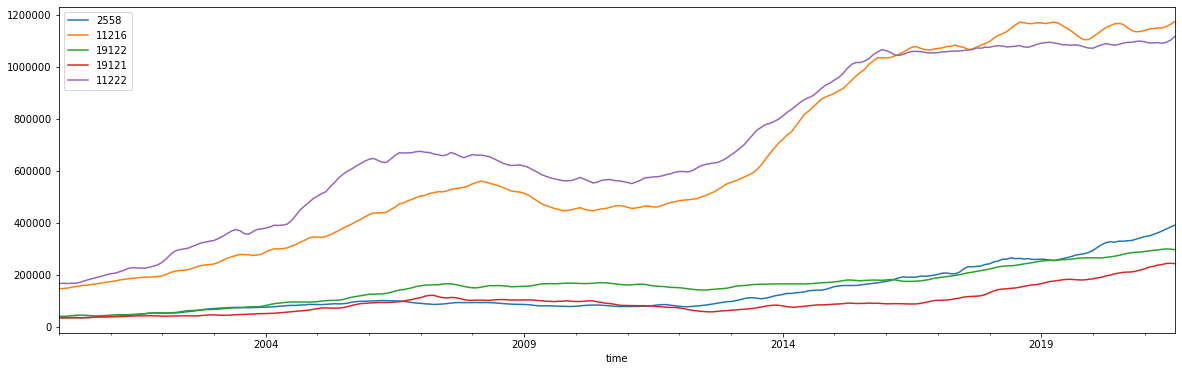

In [27]:
# import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,6))
df_2558.plot(ax=ax)
df_11216.plot(ax=ax)
df_19122.plot(ax=ax)
df_19121.plot(ax=ax)
df_11222.plot(ax=ax)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
ax.legend(['2558', '11216', '19122', '19121', '11222']);

<AxesSubplot:xlabel='time'>

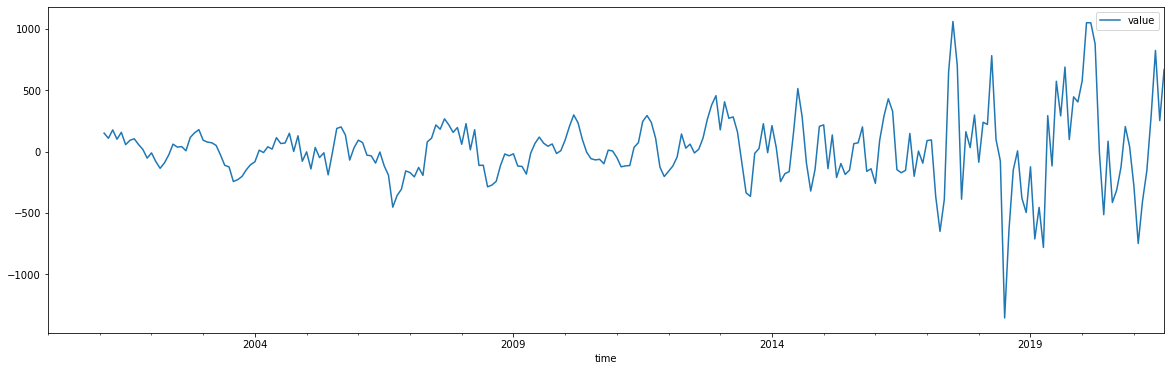

In [29]:
df_2558.diff().diff().rolling(12).mean().plot(figsize=(20,6))

<AxesSubplot:xlabel='time'>

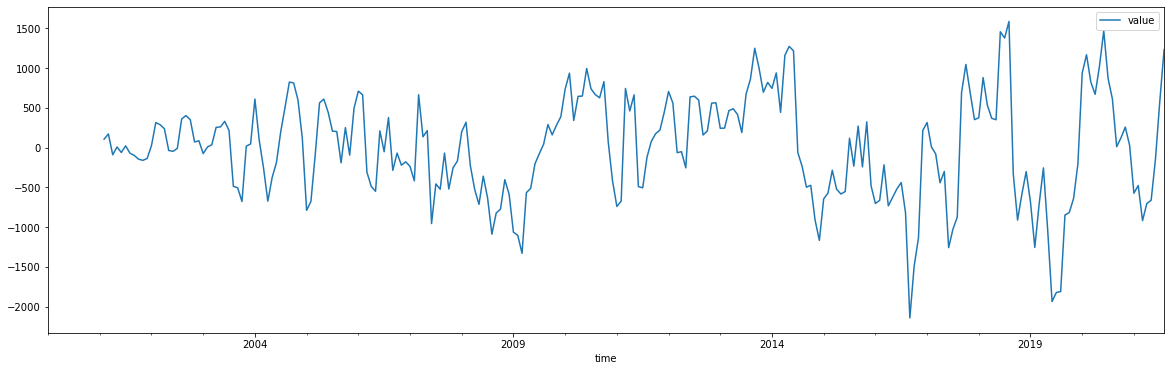

In [30]:
df_11216.diff().diff().rolling(12).mean().plot(figsize=(20,6))


<AxesSubplot:xlabel='time'>

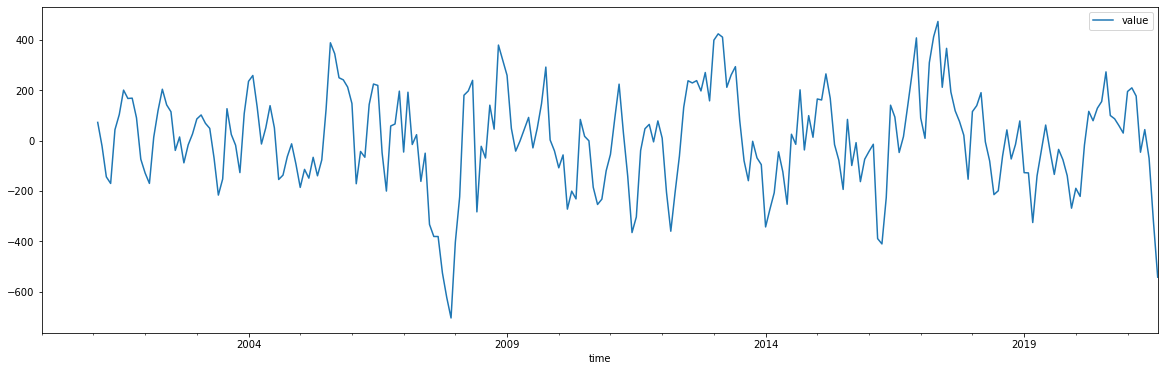

In [32]:
df_19122.diff().diff().rolling(12).mean().plot(figsize=(20,6))

<AxesSubplot:xlabel='time'>

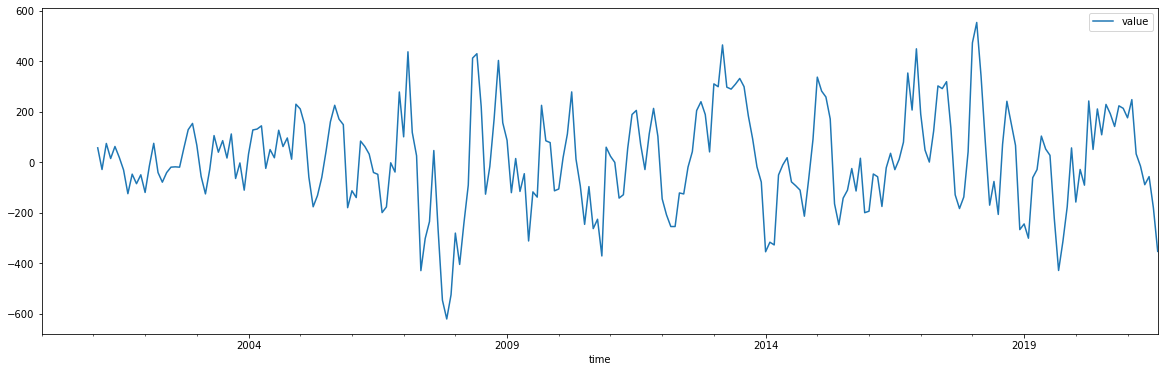

In [33]:
df_19121.diff().diff().rolling(12).mean().plot(figsize=(20,6))


<AxesSubplot:xlabel='time'>

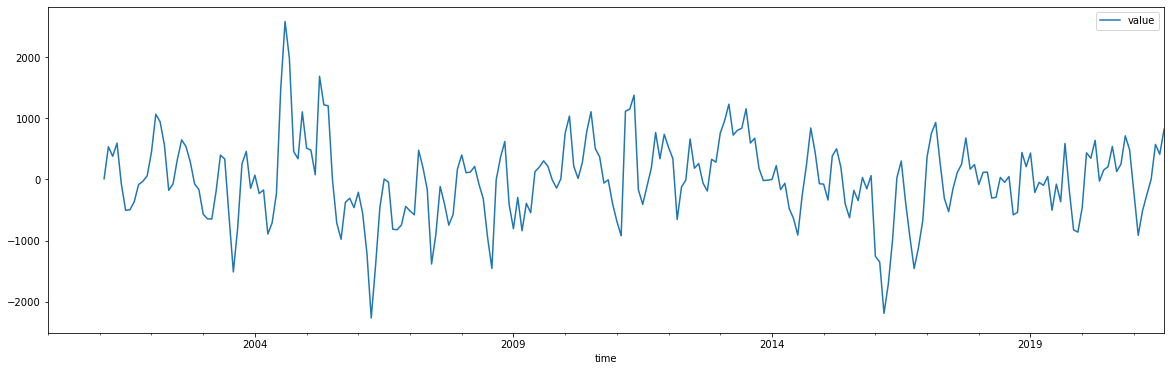

In [34]:
df_11222.diff().diff().rolling(12).mean().plot(figsize=(20,6))

In [39]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test: \n')
dftest = adfuller(df_2558)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print('2558')
print(dfoutput)
print(' ')

dftest_2 = adfuller(df_19122)

# Extract and display test results in a user friendly manner
dfoutput_2 = pd.Series(dftest_2[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest_2[4].items():
    dfoutput_2['Critical Value (%s)'%key] = value
print('19112')
print(dfoutput_2)
print(' ')
dftest_3 = adfuller(df_19121)

# Extract and display test results in a user friendly manner
dfoutput_3 = pd.Series(dftest_3[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest_3[4].items():
    dfoutput_3['Critical Value (%s)'%key] = value
print('19121')
print(dfoutput_3)
print(' ')
dftest_4 = adfuller(df_11222)

# Extract and display test results in a user friendly manner
dfoutput_4 = pd.Series(dftest_4[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest_4[4].items():
    dfoutput_4['Critical Value (%s)'%key] = value
print('11222')
print(dfoutput_4)
print(' ')
dftest_5 = adfuller(df_11216)

# Extract and display test results in a user friendly manner
dfoutput_5 = pd.Series(dftest_5[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest_5[4].items():
    dfoutput_5['Critical Value (%s)'%key] = value

print('11216')
print(dfoutput_5)


Results of Dickey-Fuller Test: 

2558
Test Statistic                   3.155621
p-value                          1.000000
#Lags Used                      15.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64
 
19112
Test Statistic                  -0.527167
p-value                          0.886605
#Lags Used                      16.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64
 
19121
Test Statistic                   0.034223
p-value                          0.961272
#Lags Used                      14.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
Critical Value (10%)            -2.573096
dtype: float64
 
11222
Test Statis

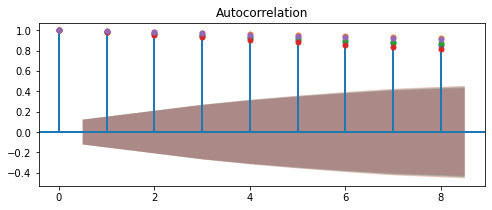

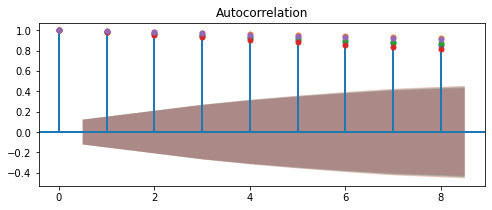

In [28]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(df_2558, ax=ax, lags =8)
plot_acf(df_11216, ax=ax, lags =8)
plot_acf(df_19122, ax=ax, lags =8)
plot_acf(df_19121, ax=ax, lags =8)
plot_acf(df_11222, ax=ax, lags =8)

1. Baseline model
2. Staitonarity (e.g. trends, seasonal patterns, cyclical patterns, differencing, Dickey Fuller Test)
3. ACF
4. PACF
5. ARIMA
6. Evaluation metric

In [65]:
import datetime
zipcode_df = df.loc[:, df.columns[9:]]
zipcode_df.index = df['RegionID']
zipcode_df.columns = pd.to_datetime(zipcode_df.columns) 
zipcode_df = zipcode_df.T
zipcode_df = zipcode_df.resample('A').mean()
zipcode_df = zipcode_df.T
zipcode_df['return percentage'] = ((zipcode_df['2021-12-31'] - zipcode_df['2000-12-31']) / zipcode_df['2000-12-31'])*100
zipcode_df['rate_per_year'] = zipcode_df['return percentage']/21

2860.292629547006

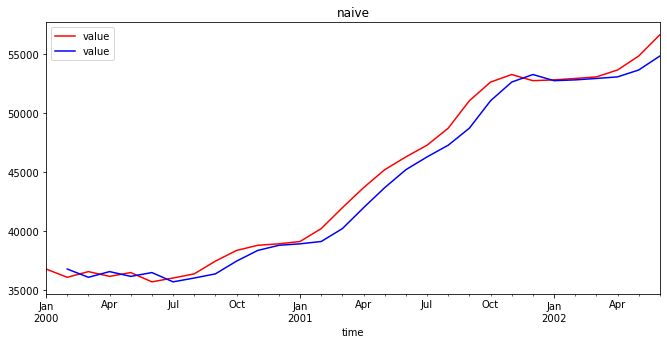

In [66]:
naive = df_2558.shift(1)
fig, ax = plt.subplots(figsize=(11, 5))
df_2558[0:30].plot(ax=ax, c='r', label='original')
naive[0:30].plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df_2558[1:], naive.dropna()))

In [88]:
df_2558_train =df_2558[:236]
df_2558_test = df_2558[236:] 

<AxesSubplot:xlabel='time'>

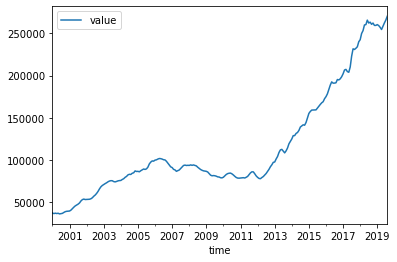

In [89]:
df_2558_train.plot()

Don't really see too much seasonality

Let's try and look at the rolling mean

<AxesSubplot:xlabel='time'>

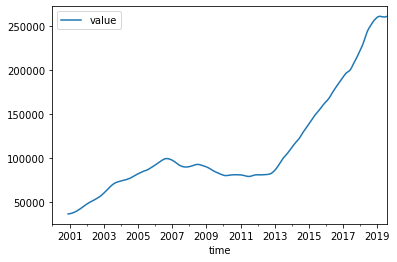

In [90]:
df_2558_train.rolling(12).mean().plot()

Definitley an upward trend after 2013

<AxesSubplot:xlabel='time'>

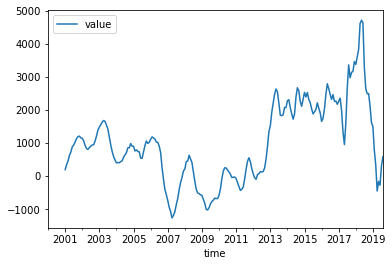

In [91]:
# Apply a 1st order difference to the time series and plot the rolling mean
df_2558_train.diff(periods=1).rolling(12).mean().plot()

Let's see if we can stabilize this trend with a second order difference

<AxesSubplot:xlabel='time'>

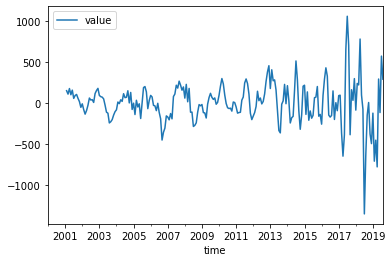

In [92]:
df_2558_train.diff().diff().rolling(12).mean().plot()

In [ ]:
# Fit a SARIMAX model on the data set with a first order difference.

In [93]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sm = SARIMAX(endog=df_2558_train, order =(0,1,0)).fit()


/Users/avijames/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/avijames/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [94]:
sm.predict()

2000-01-31         0.0
2000-02-29     36773.0
2000-03-31     36071.0
2000-04-30     36554.0
2000-05-31     36148.0
                ...   
2019-04-30    257323.0
2019-05-31    254708.0
2019-06-30    258567.0
2019-07-31    262527.0
2019-08-31    265931.0
Freq: M, Name: predicted_mean, Length: 236, dtype: float64

In [96]:
# Calculate the training root mean squared error (same syntax as a linear regression prediction)
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(df_2558_train, sm.predict(), squared=False)
rmse

3333.706139886754

In [97]:
def print_ts_metrics(endog=df_2558_train, test=df_2558_test, order=[12,2,5], seasonal_order=[0,0,0,0]):
    
    '''
    Print out RMSE for a given set of orders (seasonal and non-seasonal)
    
    Return the model fit on the training set.
    '''
    
    sm = SARIMAX(endog, order=order, seasonal_order=seasonal_order).fit()
    
    print(mean_squared_error(endog, 
                             sm.predict(endog.index[0], endog.index[-1], 
                                        typ='levels'), 
                                        squared=False))
    
    print(mean_squared_error(test, 
                             sm.predict(test.index[0], test.index[-1], 
                                        typ='levels'), 
                                        squared=False))
    return sm


In [99]:
def plot_predictions(test=df_2558_test, sm=sm):
    
    '''
    Pass a test set, as well as a model fit to the training set 
    to this function, and plot the test predictions against
    the true test values
    '''
    
    sm.predict(test.index[0], test.index[-1], typ='levels').plot()
    test.plot()

/Users/avijames/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/avijames/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/avijames/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/avijames/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


3718.9711463680774
52760.76630744249


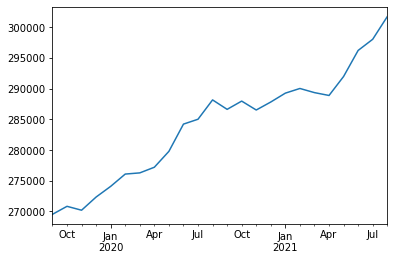

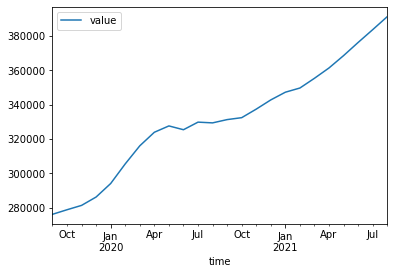

In [102]:
# set print_ts_metrics equal to model, then feed that model to plot_predictions
model = print_ts_metrics(df_2558_train, df_2558_test,[2,1,1], [1,1,0,12])
plot_predictions(df_2558_test, model)

In [103]:
sm_second = SARIMAX(endog=df_2558_train, order =(0,2,0)).fit()

/Users/avijames/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/avijames/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [104]:
sm_second.predict()

2000-01-31         0.000000
2000-02-29     67311.878102
2000-03-31     35369.000000
2000-04-30     37037.000000
2000-05-31     35742.000000
                  ...      
2019-04-30    255255.000000
2019-05-31    252093.000000
2019-06-30    262426.000000
2019-07-31    266487.000000
2019-08-31    269335.000000
Freq: M, Name: predicted_mean, Length: 236, dtype: float64

In [105]:
rmse = mean_squared_error(df_2558_train, sm_second.predict(), squared=False)
rmse

3710.0019762129104

In [110]:
def print_ts_metrics(endog=df_2558_train, test=df_2558_test, order=[0,0,0], seasonal_order=[0,0,0,0]):
    
    '''
    Print out RMSE for a given set of orders (seasonal and non-seasonal)
    
    Return the model fit on the training set.
    '''
    
    sm = SARIMAX(endog, order=order, seasonal_order=seasonal_order).fit()
    
    print(mean_squared_error(endog, 
                             sm_second.predict(endog.index[0], endog.index[-1], 
                                        typ='levels'), 
                                        squared=False))
    
    print(mean_squared_error(test, 
                             sm_second.predict(test.index[0], test.index[-1], 
                                        typ='levels'), 
                                        squared=False))
    return sm


In [111]:
def plot_predictions(test=df_2558_test, sm=sm):
    
    '''
    Pass a test set, as well as a model fit to the training set 
    to this function, and plot the test predictions against
    the true test values
    '''
    
    sm_second.predict(test.index[0], test.index[-1], typ='levels').plot()
    test.plot()

/Users/avijames/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/avijames/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/avijames/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/avijames/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


3710.0019762129104
7278.5132095550025


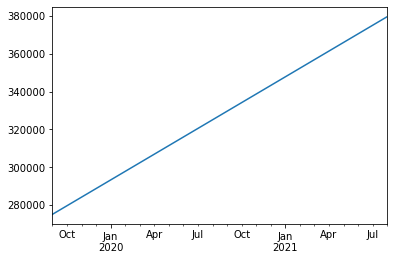

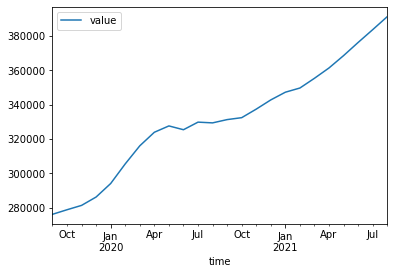

In [112]:
second_model = print_ts_metrics(df_2558_train, df_2558_test,[2,1,1], [1,1,0,12])
plot_predictions(df_2558_test, model)

<AxesSubplot:xlabel='time'>

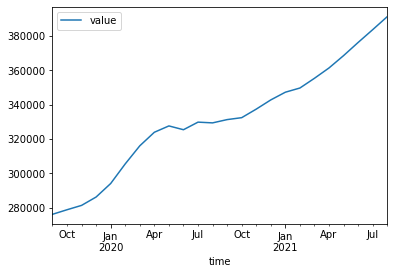

In [109]:
df_2558_test.plot()

In [113]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

In [135]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [136]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_2558,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue


ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =6945.726919411753
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =25586.074399733036
ARIMA (0, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =9815.103710505911
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =5680.111023116086
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =5361.616047414198
ARIMA (0, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =5083.358654184893
ARIMA (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =5286.82737379625
ARIMA (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =4964.659175104305
ARIMA (0, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =4693.804613526802
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =5436.996910992569
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =14645.654208776046
ARIMA (0, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =5141.655143252607
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =5291.414035464193
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =5210.303910663819
ARIMA (0, 0, 0) x (

ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =4511.135390243915
ARIMA (0, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =4281.9390526219095
ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =4372.878008394355
ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =4293.822497572348
ARIMA (0, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =4065.591592607809
ARIMA (0, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =4316.129903570392
ARIMA (0, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =4137.019856774225
ARIMA (0, 1, 1) x (1, 2, 2, 12)12 : AIC Calculated =3894.0687666687136
ARIMA (0, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =4334.515087669727
ARIMA (0, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =4327.882669264388
ARIMA (0, 1, 1) x (2, 0, 2, 12)12 : AIC Calculated =4290.6787106459615
ARIMA (0, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =4139.861424310393
ARIMA (0, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =4109.15590593333
ARIMA (0, 1, 1) x (2, 1, 2, 12)12 : AIC Calculated =4067.1092001232137
ARIMA (0, 1, 1) x

ARIMA (0, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =4228.159298649913
ARIMA (0, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =4178.711450243267
ARIMA (0, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =4094.5776687927946
ARIMA (0, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =4064.6468117294753
ARIMA (0, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =3997.2439555777137
ARIMA (0, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =4011.854491144969
ARIMA (0, 2, 2) x (2, 2, 1, 12)12 : AIC Calculated =3915.665148523225
ARIMA (0, 2, 2) x (2, 2, 2, 12)12 : AIC Calculated =3863.584914812579
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =4727.184006308147
ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =4512.483546325631
ARIMA (1, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =4367.24389646001
ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =4730.253510694957
ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =4420.5597589350855
ARIMA (1, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =4162.257195410431
ARIMA (1, 0, 0) x

ARIMA (1, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =4211.7669869430265
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =4601.483504648645
ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =4272.671464388697
ARIMA (1, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =4024.951079446118
ARIMA (1, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =4637.5282699543595
ARIMA (1, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =4277.906897167552
ARIMA (1, 1, 1) x (0, 2, 2, 12)12 : AIC Calculated =3888.732386399538
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =4433.614670305689
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =4417.3366587085875
ARIMA (1, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =4213.564639565249
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =4330.3598964088005
ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =4265.435510405721
ARIMA (1, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =4019.5834997706434
ARIMA (1, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =4285.566564471924
ARIMA (1, 1, 1)

ARIMA (1, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =4158.14365720769
ARIMA (1, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =4313.075512472429
ARIMA (1, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =4220.318551576011
ARIMA (1, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =3979.73500870478
ARIMA (1, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =4333.398118971116
ARIMA (1, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =4253.011862739406
ARIMA (1, 2, 2) x (1, 2, 2, 12)12 : AIC Calculated =4014.0355988572264
ARIMA (1, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =4195.017918872691
ARIMA (1, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =4195.855833049723
ARIMA (1, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =4158.25062233062
ARIMA (1, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =4058.7232084988623
ARIMA (1, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =4032.504586583924
ARIMA (1, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =3996.8271675687756
ARIMA (1, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =3975.4129438383043
ARIMA (1, 2, 2) x (

ARIMA (2, 1, 0) x (2, 0, 2, 12)12 : AIC Calculated =4213.347120028364
ARIMA (2, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =4051.715731558884
ARIMA (2, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =4032.8714161914454
ARIMA (2, 1, 0) x (2, 1, 2, 12)12 : AIC Calculated =4017.957607290196
ARIMA (2, 1, 0) x (2, 2, 0, 12)12 : AIC Calculated =3964.415832064119
ARIMA (2, 1, 0) x (2, 2, 1, 12)12 : AIC Calculated =3869.3572159046735
ARIMA (2, 1, 0) x (2, 2, 2, 12)12 : AIC Calculated =3870.4189812188406
ARIMA (2, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =4614.245709535695
ARIMA (2, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =4411.3818176081495
ARIMA (2, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =4188.539928769291
ARIMA (2, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =4596.351916967418
ARIMA (2, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =4291.53837658956
ARIMA (2, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =4056.5571578228846
ARIMA (2, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =4618.211074008937
ARIMA (2, 1, 1) 

ARIMA (2, 2, 2) x (0, 0, 2, 12)12 : AIC Calculated =4140.717766000618
ARIMA (2, 2, 2) x (0, 1, 0, 12)12 : AIC Calculated =4568.45543576079
ARIMA (2, 2, 2) x (0, 1, 1, 12)12 : AIC Calculated =4212.4601403906345
ARIMA (2, 2, 2) x (0, 1, 2, 12)12 : AIC Calculated =3964.087158691383
ARIMA (2, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =4610.212443025619
ARIMA (2, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =4187.166901297855
ARIMA (2, 2, 2) x (0, 2, 2, 12)12 : AIC Calculated =3848.1180962097474
ARIMA (2, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =4362.341712014949
ARIMA (2, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =4346.131135653731
ARIMA (2, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =4142.379760476519
ARIMA (2, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =4272.873613642527
ARIMA (2, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =4202.143122255919
ARIMA (2, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =3963.9725352316977
ARIMA (2, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =4308.169865994007
ARIMA (2, 2, 2) x 

In [137]:
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 2)
pdqs    (0, 2, 2, 12)
aic       3811.805477
Name: 386, dtype: object

In [138]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df_2558, 
                                        order=(1, 1, 2), 
                                        seasonal_order=(0, 2, 2, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2052      0.061     -3.391      0.001      -0.324      -0.087
ma.L1          0.8819      0.029     30.222      0.000       0.825       0.939
ma.L2          0.9023      0.028     32.090      0.000       0.847       0.957
ma.S.L12      -1.6270      0.064    -25.463      0.000      -1.752      -1.502
ma.S.L24       0.6666      0.053     12.516      0.000       0.562       0.771
sigma2      3.866e+06   3.85e+05     10.054      0.000    3.11e+06    4.62e+06


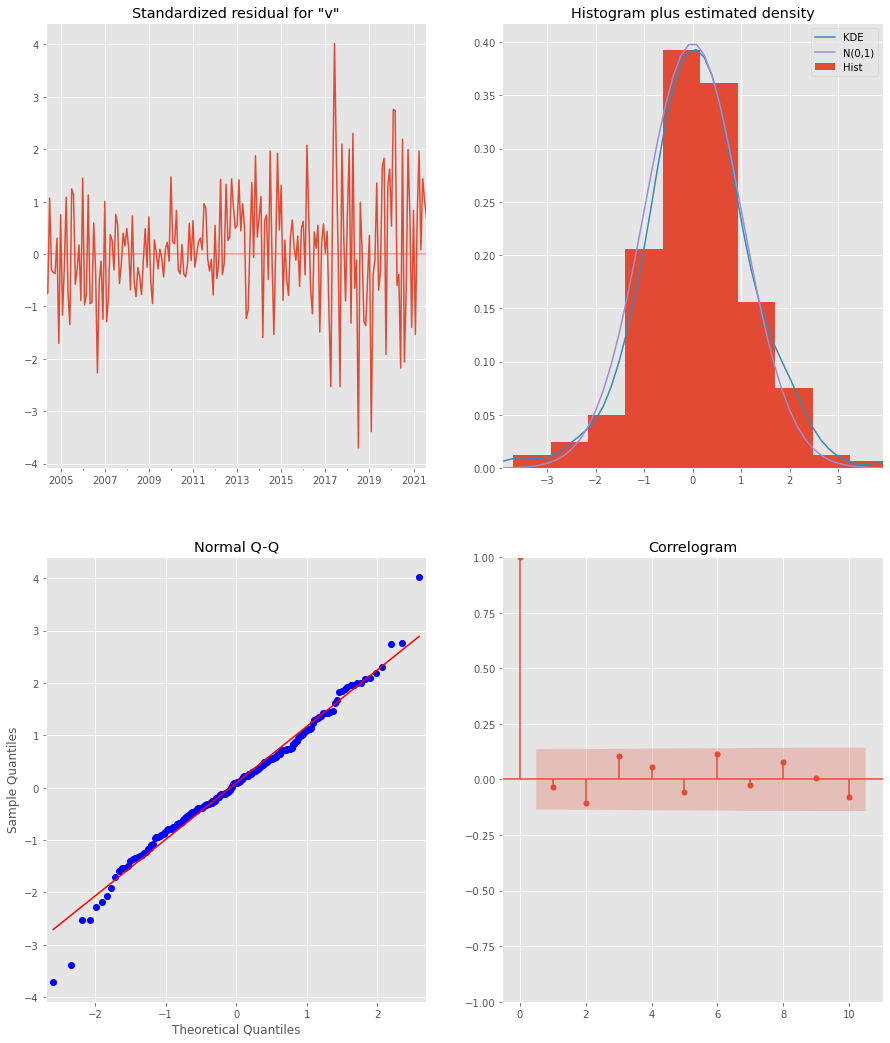

In [139]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [140]:
# Get predictions starting from 01-31-2019 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2019-01-31'), dynamic=False)
pred_conf = pred.conf_int()

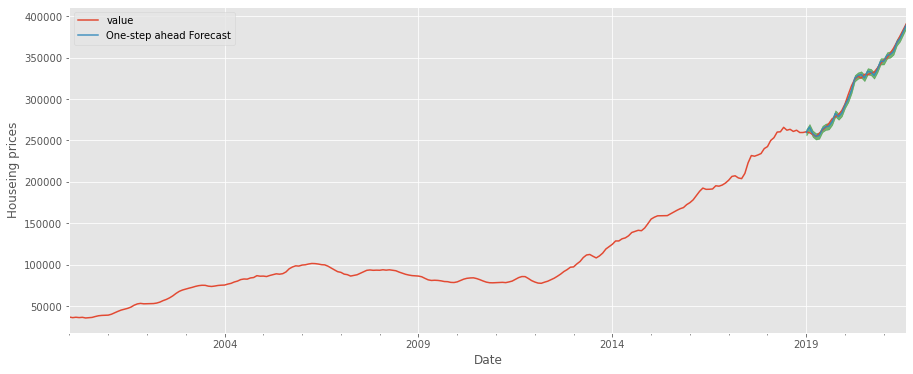

In [141]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = df_2558.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Houseing prices')
plt.legend()

plt.show()

In [158]:
# Get the real and predicted values
df2558_forecasted = pred.predicted_mean
df2558_truth = df_2558['value']['2019-01-31':]

# Compute the mean square error
mse = ((df2558_forecasted - df2558_truth) ** 2).mean()
rmse =np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 3036.37


In [133]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2019-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

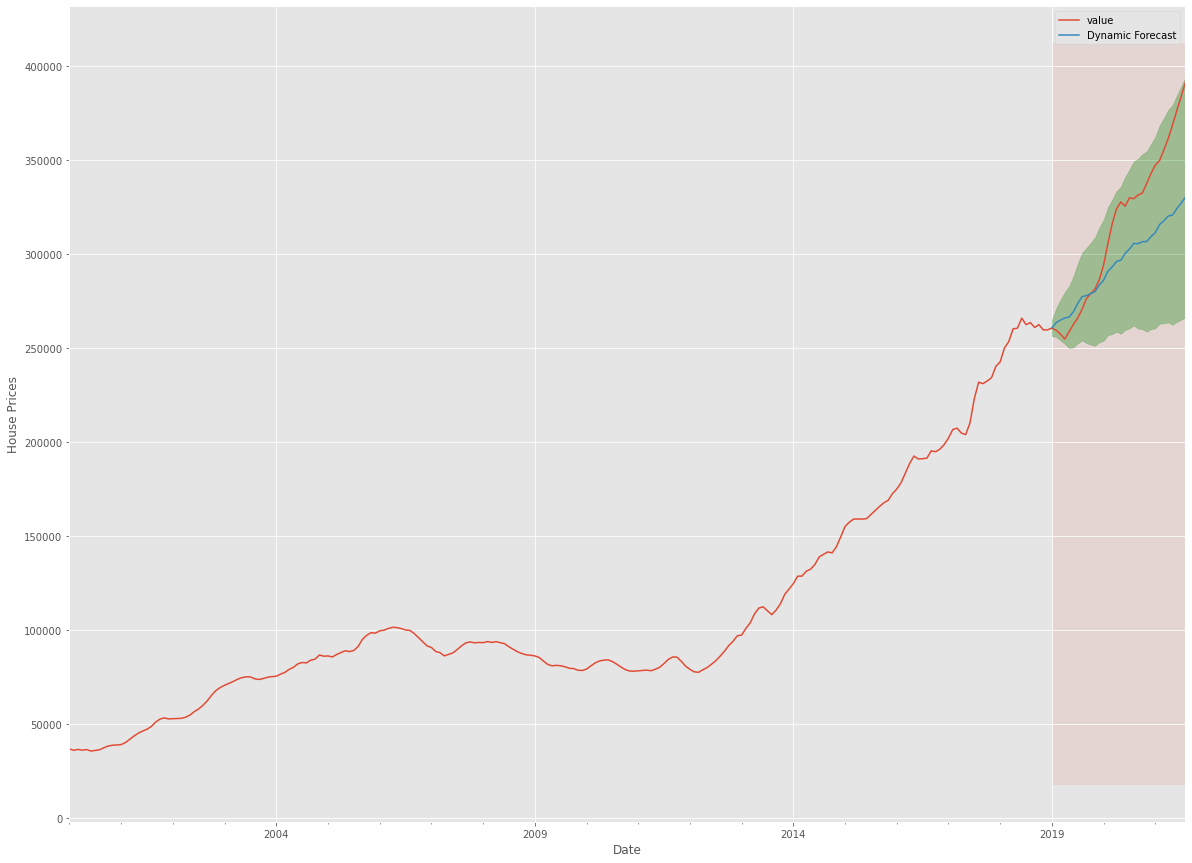

In [159]:
# Plot the dynamic forecast with confidence intervals.

ax = df_2558.plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-01-31'), df2558_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('House Prices')

plt.legend()
plt.show()

In [166]:

# Get forecast 100 steps ahead in future
prediction = output.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

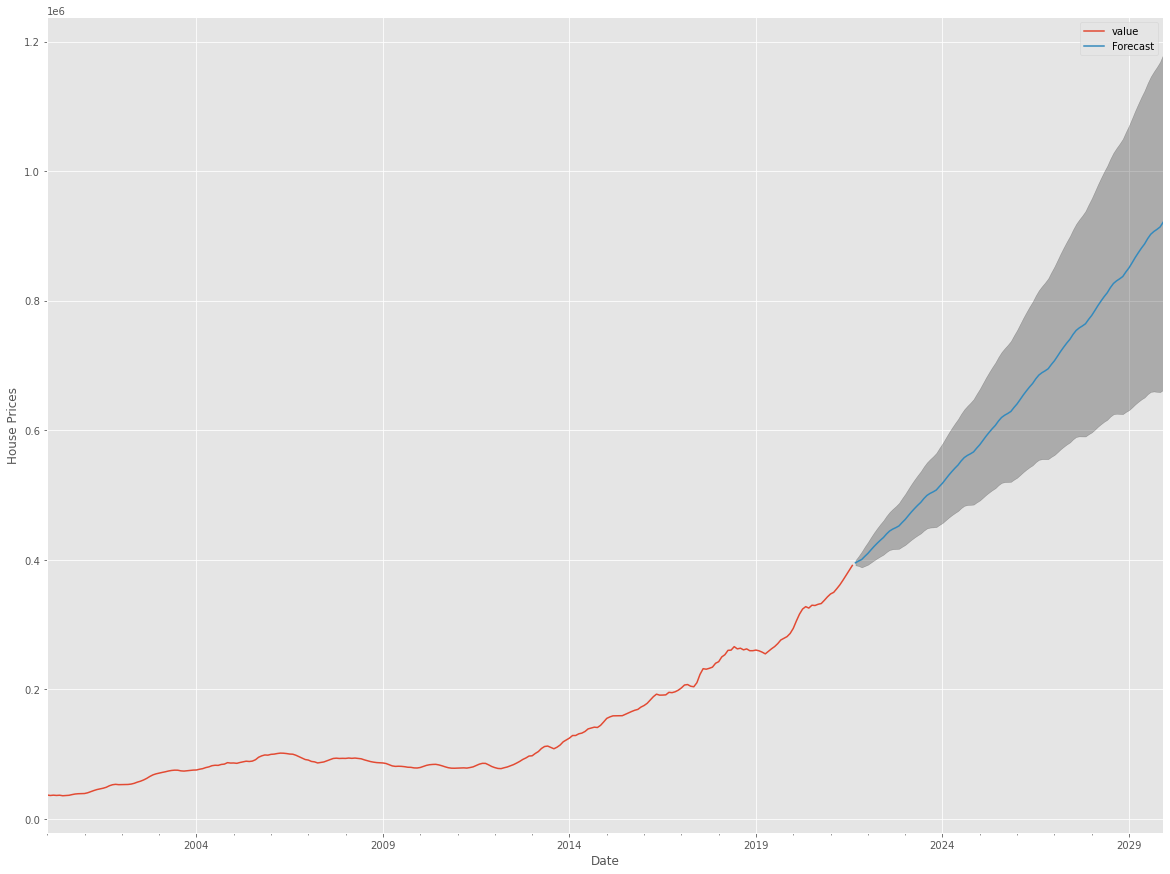

In [167]:
# Plot future predictions with confidence intervals
ax = df_2558.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('House Prices')

plt.legend()
plt.show()

2860.292629547006

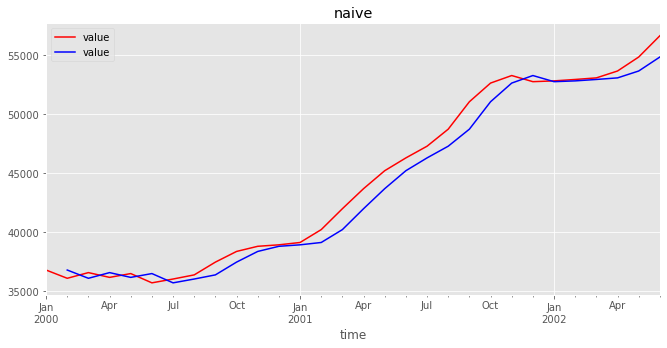

In [176]:
naive = df_2558.shift(1)
fig, ax = plt.subplots(figsize=(11, 5))
df_2558[0:30].plot(ax=ax, c='r', label='original')
naive[0:30].plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df_2558[1:], naive.dropna()))

# Dont use the code below


# !!!!!!

In [15]:
# df =get_datetimes(df)

In [5]:
# df_new= get_datetimes(df)

In [21]:
# df_new

In [22]:
# df_new.isnull().sum()

In [8]:
df.iloc[:,0:9].isnull().sum()

RegionID         0
SizeRank         0
RegionName       0
RegionType       0
StateName        0
State            0
City             0
Metro         7115
CountyName       0
dtype: int64

In [9]:
df.drop('Metro', inplace =True, axis =1)

In [11]:
df.iloc[:,:8].isnull().sum()


RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
State         0
City          0
CountyName    0
dtype: int64

In [85]:
# df_state.iloc[3].max()

In [64]:
df_state=df.groupby(df['State']).mean()
df_state

,RegionID,SizeRank,RegionName,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,2000-11-30 00:00:00,2000-12-31 00:00:00,2001-01-31 00:00:00,2001-02-28 00:00:00,2001-03-31 00:00:00,2001-04-30 00:00:00,2001-05-31 00:00:00,2001-06-30 00:00:00,2001-07-31 00:00:00,2001-08-31 00:00:00,2001-09-30 00:00:00,2001-10-31 00:00:00,2001-11-30 00:00:00,2001-12-31 00:00:00,2002-01-31 00:00:00,2002-02-28 00:00:00,2002-03-31 00:00:00,2002-04-30 00:00:00,2002-05-31 00:00:00,2002-06-30 00:00:00,2002-07-31 00:00:00,2002-08-31 00:00:00,2002-09-30 00:00:00,2002-10-31 00:00:00,2002-11-30 00:00:00,2002-12-31 00:00:00,2003-01-31 00:00:00,2003-02-28 00:00:00,2003-03-31 00:00:00,2003-04-30 00:00:00,2003-05-31 00:00:00,2003-06-30 00:00:00,2003-07-31 00:00:00,2003-08-31 00:00:00,2003-09-30 00:00:00,2003-10-31 00:00:00,2003-11-30 00:00:00,2003-12-31 00:00:00,2004-01-31 00:00:00,2004-02-29 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,2004-06-30 00:00:00,2004-07-31 00:00:00,2004-08-31 00:00:00,2004-09-30 00:00:00,2004-10-31 00:00:00,2004-11-30 00:00:00,2004-12-31 00:00:00,2005-01-31 00:00:00,2005-02-28 00:00:00,2005-03-31 00:00:00,2005-04-30 00:00:00,2005-05-31 00:00:00,2005-06-30 00:00:00,2005-07-31 00:00:00,2005-08-31 00:00:00,2005-09-30 00:00:00,2005-10-31 00:00:00,2005-11-30 00:00:00,2005-12-31 00:00:00,2006-01-31 00:00:00,2006-02-28 00:00:00,2006-03-31 00:00:00,2006-04-30 00:00:00,2006-05-31 00:00:00,2006-06-30 00:00:00,2006-07-31 00:00:00,2006-08-31 00:00:00,2006-09-30 00:00:00,2006-10-31 00:00:00,2006-11-30 00:00:00,2006-12-31 00:00:00,2007-01-31 00:00:00,2007-02-28 00:00:00,2007-03-31 00:00:00,2007-04-30 00:00:00,2007-05-31 00:00:00,2007-06-30 00:00:00,2007-07-31 00:00:00,2007-08-31 00:00:00,2007-09-30 00:00:00,2007-10-31 00:00:00,2007-11-30 00:00:00,2007-12-31 00:00:00,2008-01-31 00:00:00,2008-02-29 00:00:00,2008-03-31 00:00:00,2008-04-30 00:00:00,2008-05-31 00:00:00,2008-06-30 00:00:00,2008-07-31 00:00:00,2008-08-31 00:00:00,2008-09-30 00:00:00,2008-10-31 00:00:00,2008-11-30 00:00:00,2008-12-31 00:00:00,2009-01-31 00:00:00,2009-02-28 00:00:00,2009-03-31 00:00:00,2009-04-30 00:00:00,2009-05-31 00:00:00,2009-06-30 00:00:00,2009-07-31 00:00:00,2009-08-31 00:00:00,2009-09-30 00:00:00,2009-10-31 00:00:00,2009-11-30 00:00:00,2009-12-31 00:00:00,2010-01-31 00:00:00,2010-02-28 00:00:00,2010-03-31 00:00:00,2010-04-30 00:00:00,2010-05-31 00:00:00,2010-06-30 00:00:00,2010-07-31 00:00:00,2010-08-31 00:00:00,2010-09-30 00:00:00,2010-10-31 00:00:00,2010-11-30 00:00:00,2010-12-31 00:00:00,2011-01-31 00:00:00,2011-02-28 00:00:00,2011-03-31 00:00:00,2011-04-30 00:00:00,2011-05-31 00:00:00,2011-06-30 00:00:00,2011-07-31 00:00:00,2011-08-31 00:00:00,2011-09-30 00:00:00,2011-10-31 00:00:00,2011-11-30 00:00:00,2011-12-31 00:00:00,2012-01-31 00:00:00,2012-02-29 00:00:00,2012-03-31 00:00:00,2012-04-30 00:00:00,2012-05-31 00:00:00,2012-06-30 00:00:00,2012-07-31 00:00:00,2012-08-31 00:00:00,2012-09-30 00:00:00,2012-10-31 00:00:00,2012-11-30 00:00:00,2012-12-31 00:00:00,2013-01-31 00:00:00,2013-02-28 00:00:00,2013-03-31 00:00:00,2013-04-30 00:00:00,2013-05-31 00:00:00,2013-06-30 00:00:00,2013-07-31 00:00:00,2013-08-31 00:00:00,2013-09-30 00:00:00,2013-10-31 00:00:00,2013-11-30 00:00:00,2013-12-31 00:00:00,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-09-30 00:00:00,2014-10-31 00:00:00,2014-11-30 00:00:00,2014-12-31 00:00:00,2015-01-31 00:00:00,2015-02-28 00:00:00,2015-03-31 00:00:00,2015-04-30 00:00:00,2015-05-31 00:00:00,2015-06-30 00:00:00,2015-07-31 00:00:00,2015-08-31 00:00:00,2015-09-30 00:00:00,2015-10-31 00:00:00,2015-11-30 00:00:00,2015-12-31 00:00:00,2016-01-31 00:00:00,2016-02-29 00:00:00,2016-03-31 00:00:00,2016-04-30 00:00:00,2016-05-31 00:00:00,2016-06-30 00:00:00,2016-07-31

In [12]:
c = df.columns.tolist()
cols = c[:9] 
cols.append(c[-1]) 
print (cols)

#set to index all NOT date columns
tdf = df.set_index(df.columns.tolist()[:9])
tdf.columns = pd.to_datetime(tdf.columns).to_period('M')

# find the columns in the period 2000-2021
cols = tdf.columns
sel_cols = cols[(cols > '2000-01') & (cols < '2022')]
print (sel_cols)


#change format columns
a = tdf[sel_cols].rename(columns=lambda x: '{:}'.format(x.year, [1]))
print (a.columns)

#groupby by a with new format
mdf = a.groupby(a.columns, axis=1).mean().reset_index()

['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'CountyName', Timestamp('2000-01-31 00:00:00'), Timestamp('2021-08-31 00:00:00')]
PeriodIndex(['2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07',
             '2000-08', '2000-09', '2000-10', '2000-11',
             ...
             '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04',
             '2021-05', '2021-06', '2021-07', '2021-08'],
            dtype='period[M]', length=259, freq='M')
Index(['2000', '2000', '2000', '2000', '2000', '2000', '2000', '2000', '2000',
       '2000',
       ...
       '2020', '2020', '2021', '2021', '2021', '2021', '2021', '2021', '2021',
       '2021'],
      dtype='object', length=259)


In [123]:
# pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [15]:
mdf

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,CountyName,2000-01-31 00:00:00,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,average_return
0,61639,0,10025,Zip,NY,NY,New York,New York County,329121.0,367826.363636,447484.250000,500345.333333,576627.500000,665501.666667,7.981462e+05,8.993602e+05,8.898454e+05,9.139156e+05,7.592758e+05,709883.916667,740445.500000,7.531898e+05,8.036307e+05,9.132885e+05,9.817538e+05,1.039384e+06,1.039147e+06,1.057255e+06,1.086893e+06,1.051246e+06,1114518.875,8.653446e+05
1,84654,1,60657,Zip,IL,IL,Chicago,Cook County,311929.0,331131.818182,371998.333333,401644.666667,421723.583333,439756.000000,4.671713e+05,4.919292e+05,4.913812e+05,4.709787e+05,4.344749e+05,422539.666667,398936.000000,3.846148e+05,4.161048e+05,4.476602e+05,4.568003e+05,4.719039e+05,4.852757e+05,4.922336e+05,4.867452e+05,4.897790e+05,509026.125,4.668122e+05
2,61637,2,10023,Zip,NY,NY,New York,New York County,500887.0,541272.000000,636834.166667,716431.416667,809314.166667,915925.083333,1.078528e+06,1.206610e+06,1.207426e+06,1.272393e+06,1.021550e+06,938849.000000,997383.166667,1.034857e+06,1.103962e+06,1.243271e+06,1.321928e+06,1.392055e+06,1.422695e+06,1.505360e+06,1.419982e+06,1.471571e+06,1456762.750,1.176198e+06
3,91982,3,77494,Zip,TX,TX,Katy,Harris County,225325.0,226703.727273,229747.166667,230232.583333,234434.916667,243372.833333,2.500888e+05,2.536468e+05,2.611938e+05,2.646818e+05,2.646564e+05,271164.083333,263868.500000,2.684410e+05,2.869938e+05,3.192941e+05,3.397708e+05,3.375233e+05,3.345385e+05,3.381329e+05,3.393977e+05,3.434595e+05,382106.375,3.010522e+05
4,84616,4,60614,Zip,IL,IL,Chicago,Cook County,405926.0,427281.000000,476746.583333,510428.833333,535184.333333,555543.833333,5.897735e+05,6.223890e+05,6.255586e+05,5.998671e+05,5.543326e+05,535821.166667,502984.750000,4.886890e+05,5.315863e+05,5.732739e+05,5.939389e+05,6.149928e+05,6.308151e+05,6.382121e+05,6.310842e+05,6.287728e+05,649397.375,5.970142e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30518,66169,34430,20052,Zip,DC,DC,Washington,District of Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.008782e+06,1.128236e+06,1.173981e+06,1.212649e+06,1.329028e+06,1.280291e+06,1.312291e+06,1.364288e+06,1421879.875,NaN
30519,89666,34430,72630,Zip,AR,AR,Diamond City,Boone County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.067427e+05,112764.750,NaN
30520,62532,34430,12345,Zip,OR,OR,Central Point,Jackson County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.752542e+04,8.052867e+04,8.587800e+04,9.975333e+04,1.118452e+05,1.188176e+05,1.303943e+05,1.370604e+05,1.371219e+05,159635.000,NaN
30521,87060,34430,66045,Zip,KS,KS,Lawrence,Douglas County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.839559e+05,1.873850e+05,1.974940e+05,241802.875,NaN


In [20]:
mdf['average_annual_return'] = (((mdf['2021']-mdf['2000'])/mdf['2000'])*100)
mdf['average_annual_return'].max()

891.4023783185839

In [14]:
mdf['average_return'] = ((mdf['2000'] + mdf['2001']+ mdf['2002']+ mdf['2003']+ mdf['2004']+ mdf['2005']+ mdf['2006']+ mdf['2007']+ mdf['2008']+ mdf['2009']+ mdf['2010']+ mdf['2011']+ mdf['2012']+ mdf['2013']+ mdf['2014']+ mdf['2015']+ mdf['2016']+ mdf['2017']+ mdf['2018']+ mdf['2019']+ mdf['2021']+ mdf['2021'])/21)
mdf

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,CountyName,2000-01-31 00:00:00,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,average_return
0,61639,0,10025,Zip,NY,NY,New York,New York County,329121.0,367826.363636,447484.250000,500345.333333,576627.500000,665501.666667,7.981462e+05,8.993602e+05,8.898454e+05,9.139156e+05,7.592758e+05,709883.916667,740445.500000,7.531898e+05,8.036307e+05,9.132885e+05,9.817538e+05,1.039384e+06,1.039147e+06,1.057255e+06,1.086893e+06,1.051246e+06,1114518.875,8.653446e+05
1,84654,1,60657,Zip,IL,IL,Chicago,Cook County,311929.0,331131.818182,371998.333333,401644.666667,421723.583333,439756.000000,4.671713e+05,4.919292e+05,4.913812e+05,4.709787e+05,4.344749e+05,422539.666667,398936.000000,3.846148e+05,4.161048e+05,4.476602e+05,4.568003e+05,4.719039e+05,4.852757e+05,4.922336e+05,4.867452e+05,4.897790e+05,509026.125,4.668122e+05
2,61637,2,10023,Zip,NY,NY,New York,New York County,500887.0,541272.000000,636834.166667,716431.416667,809314.166667,915925.083333,1.078528e+06,1.206610e+06,1.207426e+06,1.272393e+06,1.021550e+06,938849.000000,997383.166667,1.034857e+06,1.103962e+06,1.243271e+06,1.321928e+06,1.392055e+06,1.422695e+06,1.505360e+06,1.419982e+06,1.471571e+06,1456762.750,1.176198e+06
3,91982,3,77494,Zip,TX,TX,Katy,Harris County,225325.0,226703.727273,229747.166667,230232.583333,234434.916667,243372.833333,2.500888e+05,2.536468e+05,2.611938e+05,2.646818e+05,2.646564e+05,271164.083333,263868.500000,2.684410e+05,2.869938e+05,3.192941e+05,3.397708e+05,3.375233e+05,3.345385e+05,3.381329e+05,3.393977e+05,3.434595e+05,382106.375,3.010522e+05
4,84616,4,60614,Zip,IL,IL,Chicago,Cook County,405926.0,427281.000000,476746.583333,510428.833333,535184.333333,555543.833333,5.897735e+05,6.223890e+05,6.255586e+05,5.998671e+05,5.543326e+05,535821.166667,502984.750000,4.886890e+05,5.315863e+05,5.732739e+05,5.939389e+05,6.149928e+05,6.308151e+05,6.382121e+05,6.310842e+05,6.287728e+05,649397.375,5.970142e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30518,66169,34430,20052,Zip,DC,DC,Washington,District of Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.008782e+06,1.128236e+06,1.173981e+06,1.212649e+06,1.329028e+06,1.280291e+06,1.312291e+06,1.364288e+06,1421879.875,NaN
30519,89666,34430,72630,Zip,AR,AR,Diamond City,Boone County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.067427e+05,112764.750,NaN
30520,62532,34430,12345,Zip,OR,OR,Central Point,Jackson County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.752542e+04,8.052867e+04,8.587800e+04,9.975333e+04,1.118452e+05,1.188176e+05,1.303943e+05,1.370604e+05,1.371219e+05,159635.000,NaN
30521,87060,34430,66045,Zip,KS,KS,Lawrence,Douglas County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.839559e+05,1.873850e+05,1.974940e+05,241802.875,NaN


In [22]:
mdf['rate_year']=mdf['average_annual_return']/21
mdf

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,CountyName,2000-01-31 00:00:00,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,average_return,average_annual_return,rate/year,rate_year
0,61639,0,10025,Zip,NY,NY,New York,New York County,329121.0,367826.363636,447484.250000,500345.333333,576627.500000,665501.666667,7.981462e+05,8.993602e+05,8.898454e+05,9.139156e+05,7.592758e+05,709883.916667,740445.500000,7.531898e+05,8.036307e+05,9.132885e+05,9.817538e+05,1.039384e+06,1.039147e+06,1.057255e+06,1.086893e+06,1.051246e+06,1114518.875,8.653446e+05,203.001357,41206.887446,9.666731
1,84654,1,60657,Zip,IL,IL,Chicago,Cook County,311929.0,331131.818182,371998.333333,401644.666667,421723.583333,439756.000000,4.671713e+05,4.919292e+05,4.913812e+05,4.709787e+05,4.344749e+05,422539.666667,398936.000000,3.846148e+05,4.161048e+05,4.476602e+05,4.568003e+05,4.719039e+05,4.852757e+05,4.922336e+05,4.867452e+05,4.897790e+05,509026.125,4.668122e+05,53.723109,22229.152271,2.558243
2,61637,2,10023,Zip,NY,NY,New York,New York County,500887.0,541272.000000,636834.166667,716431.416667,809314.166667,915925.083333,1.078528e+06,1.206610e+06,1.207426e+06,1.272393e+06,1.021550e+06,938849.000000,997383.166667,1.034857e+06,1.103962e+06,1.243271e+06,1.321928e+06,1.392055e+06,1.422695e+06,1.505360e+06,1.419982e+06,1.471571e+06,1456762.750,1.176198e+06,169.136913,56009.413643,8.054139
3,91982,3,77494,Zip,TX,TX,Katy,Harris County,225325.0,226703.727273,229747.166667,230232.583333,234434.916667,243372.833333,2.500888e+05,2.536468e+05,2.611938e+05,2.646818e+05,2.646564e+05,271164.083333,263868.500000,2.684410e+05,2.869938e+05,3.192941e+05,3.397708e+05,3.375233e+05,3.345385e+05,3.381329e+05,3.393977e+05,3.434595e+05,382106.375,3.010522e+05,68.548784,14335.819109,3.264228
4,84616,4,60614,Zip,IL,IL,Chicago,Cook County,405926.0,427281.000000,476746.583333,510428.833333,535184.333333,555543.833333,5.897735e+05,6.223890e+05,6.255586e+05,5.998671e+05,5.543326e+05,535821.166667,502984.750000,4.886890e+05,5.315863e+05,5.732739e+05,5.939389e+05,6.149928e+05,6.308151e+05,6.382121e+05,6.310842e+05,6.287728e+05,649397.375,5.970142e+05,51.983677,28429.247732,2.475413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30518,66169,34430,20052,Zip,DC,DC,Washington,District of Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.008782e+06,1.128236e+06,1.173981e+06,1.212649e+06,1.329028e+06,1.280291e+06,1.312291e+06,1.364288e+06,1421879.875,NaN,NaN,NaN,NaN
30519,89666,34430,72630,Zip,AR,AR,Diamond City,Boone County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.067427e+05,112764.750,NaN,NaN,NaN,NaN
30520,62532,34430,12345,Zip,OR,OR,Central Point,Jackson County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.752542e+04,8.052867e+04,8.587800e+04,9.975333e+04,1.118452e+05,1.188176e+05,1.303943e+05,1.370604e+05,1.371219e+05,159635.000,NaN,NaN,NaN,NaN
30521,87060,34430,66045,Zip,KS,KS,Lawrence,Douglas County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.839559e+05,1.873850e+05,1.974940e+05,241802.875,NaN,NaN,NaN,NaN


In [24]:
mdf.drop('rate/year',inplace=True, axis =1)
mdf

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,CountyName,2000-01-31 00:00:00,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,average_return,average_annual_return,rate_year
0,61639,0,10025,Zip,NY,NY,New York,New York County,329121.0,367826.363636,447484.250000,500345.333333,576627.500000,665501.666667,7.981462e+05,8.993602e+05,8.898454e+05,9.139156e+05,7.592758e+05,709883.916667,740445.500000,7.531898e+05,8.036307e+05,9.132885e+05,9.817538e+05,1.039384e+06,1.039147e+06,1.057255e+06,1.086893e+06,1.051246e+06,1114518.875,8.653446e+05,203.001357,9.666731
1,84654,1,60657,Zip,IL,IL,Chicago,Cook County,311929.0,331131.818182,371998.333333,401644.666667,421723.583333,439756.000000,4.671713e+05,4.919292e+05,4.913812e+05,4.709787e+05,4.344749e+05,422539.666667,398936.000000,3.846148e+05,4.161048e+05,4.476602e+05,4.568003e+05,4.719039e+05,4.852757e+05,4.922336e+05,4.867452e+05,4.897790e+05,509026.125,4.668122e+05,53.723109,2.558243
2,61637,2,10023,Zip,NY,NY,New York,New York County,500887.0,541272.000000,636834.166667,716431.416667,809314.166667,915925.083333,1.078528e+06,1.206610e+06,1.207426e+06,1.272393e+06,1.021550e+06,938849.000000,997383.166667,1.034857e+06,1.103962e+06,1.243271e+06,1.321928e+06,1.392055e+06,1.422695e+06,1.505360e+06,1.419982e+06,1.471571e+06,1456762.750,1.176198e+06,169.136913,8.054139
3,91982,3,77494,Zip,TX,TX,Katy,Harris County,225325.0,226703.727273,229747.166667,230232.583333,234434.916667,243372.833333,2.500888e+05,2.536468e+05,2.611938e+05,2.646818e+05,2.646564e+05,271164.083333,263868.500000,2.684410e+05,2.869938e+05,3.192941e+05,3.397708e+05,3.375233e+05,3.345385e+05,3.381329e+05,3.393977e+05,3.434595e+05,382106.375,3.010522e+05,68.548784,3.264228
4,84616,4,60614,Zip,IL,IL,Chicago,Cook County,405926.0,427281.000000,476746.583333,510428.833333,535184.333333,555543.833333,5.897735e+05,6.223890e+05,6.255586e+05,5.998671e+05,5.543326e+05,535821.166667,502984.750000,4.886890e+05,5.315863e+05,5.732739e+05,5.939389e+05,6.149928e+05,6.308151e+05,6.382121e+05,6.310842e+05,6.287728e+05,649397.375,5.970142e+05,51.983677,2.475413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30518,66169,34430,20052,Zip,DC,DC,Washington,District of Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.008782e+06,1.128236e+06,1.173981e+06,1.212649e+06,1.329028e+06,1.280291e+06,1.312291e+06,1.364288e+06,1421879.875,NaN,NaN,NaN
30519,89666,34430,72630,Zip,AR,AR,Diamond City,Boone County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.067427e+05,112764.750,NaN,NaN,NaN
30520,62532,34430,12345,Zip,OR,OR,Central Point,Jackson County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.752542e+04,8.052867e+04,8.587800e+04,9.975333e+04,1.118452e+05,1.188176e+05,1.303943e+05,1.370604e+05,1.371219e+05,159635.000,NaN,NaN,NaN
30521,87060,34430,66045,Zip,KS,KS,Lawrence,Douglas County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.839559e+05,1.873850e+05,1.974940e+05,241802.875,NaN,NaN,NaN


In [48]:
top_five = mdf.sort_values(by='rate_year', ascending=False).head(5)


In [50]:
top_five

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,CountyName,2000-01-31 00:00:00,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,average_return,average_annual_return,rate_year
16413,58807,16737,2558,Zip,MA,MA,Wareham,Plymouth County,36773.0,36981.818182,46860.750000,58951.166667,73839.583333,81465.333333,91191.083333,98618.500000,90287.416667,90895.416667,81423.500000,81278.916667,81293.000000,84706.583333,109882.416667,136346.750000,1.623931e+05,1.896925e+05,2.189622e+05,2.584022e+05,2.676696e+05,3.246265e+05,366638.625,1.464009e+05,891.402378,42.447732
9350,96296,9450,91108,Zip,CA,CA,San Marino,Los Angeles County,312299.0,324067.272727,351178.916667,390211.750000,448140.250000,534485.000000,636939.666667,705031.000000,711395.666667,652395.750000,593293.500000,631559.000000,617201.500000,627523.416667,763855.916667,907175.250000,1.087807e+06,1.335239e+06,1.595716e+06,1.874218e+06,2.093343e+06,2.328716e+06,2416490.375,1.033988e+06,645.675537,30.746454
513,62027,516,11216,Zip,NY,NY,New York,Kings County,146780.0,159543.000000,186038.166667,220661.500000,268010.916667,313416.416667,377583.333333,460031.750000,522687.083333,541119.583333,471203.166667,456315.666667,465404.083333,507982.166667,613773.833333,814626.583333,9.696168e+05,1.058784e+06,1.076584e+06,1.145235e+06,1.144215e+06,1.145505e+06,1152785.125,6.704001e+05,622.554499,29.645452
5329,65789,5379,19122,Zip,PA,PA,Philadelphia,Philadelphia County,40085.0,43344.909091,49257.500000,60191.916667,73493.833333,92622.500000,107774.916667,136895.916667,160958.416667,155417.500000,164019.416667,167015.916667,158536.416667,145589.583333,161409.416667,167096.083333,1.783024e+05,1.789871e+05,2.031756e+05,2.369558e+05,2.594141e+05,2.750910e+05,295731.375,1.662820e+05,582.274761,27.727370
1561,65788,1572,19121,Zip,PA,PA,Philadelphia,Philadelphia County,35211.0,36210.818182,41512.083333,42839.500000,47378.500000,58035.166667,77900.916667,97453.083333,113018.166667,103451.750000,100302.583333,93118.083333,79137.750000,62845.750000,73558.916667,81038.500000,9.014233e+04,9.106808e+04,1.119107e+05,1.495841e+05,1.782407e+05,2.029722e+05,236809.125,1.048746e+05,553.973417,26.379687


In [71]:
df[df['RegionID']==58807|62027|65788| 65789|96296]

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,CountyName,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,2000-11-30 00:00:00,2000-12-31 00:00:00,2001-01-31 00:00:00,2001-02-28 00:00:00,2001-03-31 00:00:00,2001-04-30 00:00:00,2001-05-31 00:00:00,2001-06-30 00:00:00,2001-07-31 00:00:00,2001-08-31 00:00:00,2001-09-30 00:00:00,2001-10-31 00:00:00,2001-11-30 00:00:00,2001-12-31 00:00:00,2002-01-31 00:00:00,2002-02-28 00:00:00,2002-03-31 00:00:00,2002-04-30 00:00:00,2002-05-31 00:00:00,2002-06-30 00:00:00,2002-07-31 00:00:00,2002-08-31 00:00:00,2002-09-30 00:00:00,2002-10-31 00:00:00,2002-11-30 00:00:00,2002-12-31 00:00:00,2003-01-31 00:00:00,2003-02-28 00:00:00,2003-03-31 00:00:00,2003-04-30 00:00:00,2003-05-31 00:00:00,2003-06-30 00:00:00,2003-07-31 00:00:00,2003-08-31 00:00:00,2003-09-30 00:00:00,2003-10-31 00:00:00,2003-11-30 00:00:00,2003-12-31 00:00:00,2004-01-31 00:00:00,2004-02-29 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,2004-06-30 00:00:00,2004-07-31 00:00:00,2004-08-31 00:00:00,2004-09-30 00:00:00,2004-10-31 00:00:00,2004-11-30 00:00:00,2004-12-31 00:00:00,2005-01-31 00:00:00,2005-02-28 00:00:00,2005-03-31 00:00:00,2005-04-30 00:00:00,2005-05-31 00:00:00,2005-06-30 00:00:00,2005-07-31 00:00:00,2005-08-31 00:00:00,2005-09-30 00:00:00,2005-10-31 00:00:00,2005-11-30 00:00:00,2005-12-31 00:00:00,2006-01-31 00:00:00,2006-02-28 00:00:00,2006-03-31 00:00:00,2006-04-30 00:00:00,2006-05-31 00:00:00,2006-06-30 00:00:00,2006-07-31 00:00:00,2006-08-31 00:00:00,2006-09-30 00:00:00,2006-10-31 00:00:00,2006-11-30 00:00:00,2006-12-31 00:00:00,2007-01-31 00:00:00,2007-02-28 00:00:00,2007-03-31 00:00:00,2007-04-30 00:00:00,2007-05-31 00:00:00,2007-06-30 00:00:00,2007-07-31 00:00:00,2007-08-31 00:00:00,2007-09-30 00:00:00,2007-10-31 00:00:00,2007-11-30 00:00:00,2007-12-31 00:00:00,2008-01-31 00:00:00,2008-02-29 00:00:00,2008-03-31 00:00:00,2008-04-30 00:00:00,2008-05-31 00:00:00,2008-06-30 00:00:00,2008-07-31 00:00:00,2008-08-31 00:00:00,2008-09-30 00:00:00,2008-10-31 00:00:00,2008-11-30 00:00:00,2008-12-31 00:00:00,2009-01-31 00:00:00,2009-02-28 00:00:00,2009-03-31 00:00:00,2009-04-30 00:00:00,2009-05-31 00:00:00,2009-06-30 00:00:00,2009-07-31 00:00:00,2009-08-31 00:00:00,2009-09-30 00:00:00,2009-10-31 00:00:00,2009-11-30 00:00:00,2009-12-31 00:00:00,2010-01-31 00:00:00,2010-02-28 00:00:00,2010-03-31 00:00:00,2010-04-30 00:00:00,2010-05-31 00:00:00,2010-06-30 00:00:00,2010-07-31 00:00:00,2010-08-31 00:00:00,2010-09-30 00:00:00,2010-10-31 00:00:00,2010-11-30 00:00:00,2010-12-31 00:00:00,2011-01-31 00:00:00,2011-02-28 00:00:00,2011-03-31 00:00:00,2011-04-30 00:00:00,2011-05-31 00:00:00,2011-06-30 00:00:00,2011-07-31 00:00:00,2011-08-31 00:00:00,2011-09-30 00:00:00,2011-10-31 00:00:00,2011-11-30 00:00:00,2011-12-31 00:00:00,2012-01-31 00:00:00,2012-02-29 00:00:00,2012-03-31 00:00:00,2012-04-30 00:00:00,2012-05-31 00:00:00,2012-06-30 00:00:00,2012-07-31 00:00:00,2012-08-31 00:00:00,2012-09-30 00:00:00,2012-10-31 00:00:00,2012-11-30 00:00:00,2012-12-31 00:00:00,2013-01-31 00:00:00,2013-02-28 00:00:00,2013-03-31 00:00:00,2013-04-30 00:00:00,2013-05-31 00:00:00,2013-06-30 00:00:00,2013-07-31 00:00:00,2013-08-31 00:00:00,2013-09-30 00:00:00,2013-10-31 00:00:00,2013-11-30 00:00:00,2013-12-31 00:00:00,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-09-30 00:00:00,2014-10-31 00:00:00,2014-11-30 00:00:00,2014-12-31 00:00:00,2015-01-31 00:00:00,2015-02-28 00:00:00,2015-03-31 00:00:00,2015-04-30 00:00:00,2015-05-31 00:00:00,2015-06-30 00:00:00,2015-07-31 00:00:00,2015-08-31 00:00:00,2015-09-30 00:00:00,2015-10-31 00:00:00,2015-11-30 00:00:00,2015-12-31 00:00:00,2016-01-31 00:00:00,2016-02-29 00:00:00,2016-03-31 00:00:00,2016-04-30 00:00:00,2016-05

In [74]:
df = df[df['State'].isin(['NY', 'PA', 'NJ', 'MA', 'CT'])]
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,CountyName,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,2000-11-30 00:00:00,2000-12-31 00:00:00,2001-01-31 00:00:00,2001-02-28 00:00:00,2001-03-31 00:00:00,2001-04-30 00:00:00,2001-05-31 00:00:00,2001-06-30 00:00:00,2001-07-31 00:00:00,2001-08-31 00:00:00,2001-09-30 00:00:00,2001-10-31 00:00:00,2001-11-30 00:00:00,2001-12-31 00:00:00,2002-01-31 00:00:00,2002-02-28 00:00:00,2002-03-31 00:00:00,2002-04-30 00:00:00,2002-05-31 00:00:00,2002-06-30 00:00:00,2002-07-31 00:00:00,2002-08-31 00:00:00,2002-09-30 00:00:00,2002-10-31 00:00:00,2002-11-30 00:00:00,2002-12-31 00:00:00,2003-01-31 00:00:00,2003-02-28 00:00:00,2003-03-31 00:00:00,2003-04-30 00:00:00,2003-05-31 00:00:00,2003-06-30 00:00:00,2003-07-31 00:00:00,2003-08-31 00:00:00,2003-09-30 00:00:00,2003-10-31 00:00:00,2003-11-30 00:00:00,2003-12-31 00:00:00,2004-01-31 00:00:00,2004-02-29 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,2004-06-30 00:00:00,2004-07-31 00:00:00,2004-08-31 00:00:00,2004-09-30 00:00:00,2004-10-31 00:00:00,2004-11-30 00:00:00,2004-12-31 00:00:00,2005-01-31 00:00:00,2005-02-28 00:00:00,2005-03-31 00:00:00,2005-04-30 00:00:00,2005-05-31 00:00:00,2005-06-30 00:00:00,2005-07-31 00:00:00,2005-08-31 00:00:00,2005-09-30 00:00:00,2005-10-31 00:00:00,2005-11-30 00:00:00,2005-12-31 00:00:00,2006-01-31 00:00:00,2006-02-28 00:00:00,2006-03-31 00:00:00,2006-04-30 00:00:00,2006-05-31 00:00:00,2006-06-30 00:00:00,2006-07-31 00:00:00,2006-08-31 00:00:00,2006-09-30 00:00:00,2006-10-31 00:00:00,2006-11-30 00:00:00,2006-12-31 00:00:00,2007-01-31 00:00:00,2007-02-28 00:00:00,2007-03-31 00:00:00,2007-04-30 00:00:00,2007-05-31 00:00:00,2007-06-30 00:00:00,2007-07-31 00:00:00,2007-08-31 00:00:00,2007-09-30 00:00:00,2007-10-31 00:00:00,2007-11-30 00:00:00,2007-12-31 00:00:00,2008-01-31 00:00:00,2008-02-29 00:00:00,2008-03-31 00:00:00,2008-04-30 00:00:00,2008-05-31 00:00:00,2008-06-30 00:00:00,2008-07-31 00:00:00,2008-08-31 00:00:00,2008-09-30 00:00:00,2008-10-31 00:00:00,2008-11-30 00:00:00,2008-12-31 00:00:00,2009-01-31 00:00:00,2009-02-28 00:00:00,2009-03-31 00:00:00,2009-04-30 00:00:00,2009-05-31 00:00:00,2009-06-30 00:00:00,2009-07-31 00:00:00,2009-08-31 00:00:00,2009-09-30 00:00:00,2009-10-31 00:00:00,2009-11-30 00:00:00,2009-12-31 00:00:00,2010-01-31 00:00:00,2010-02-28 00:00:00,2010-03-31 00:00:00,2010-04-30 00:00:00,2010-05-31 00:00:00,2010-06-30 00:00:00,2010-07-31 00:00:00,2010-08-31 00:00:00,2010-09-30 00:00:00,2010-10-31 00:00:00,2010-11-30 00:00:00,2010-12-31 00:00:00,2011-01-31 00:00:00,2011-02-28 00:00:00,2011-03-31 00:00:00,2011-04-30 00:00:00,2011-05-31 00:00:00,2011-06-30 00:00:00,2011-07-31 00:00:00,2011-08-31 00:00:00,2011-09-30 00:00:00,2011-10-31 00:00:00,2011-11-30 00:00:00,2011-12-31 00:00:00,2012-01-31 00:00:00,2012-02-29 00:00:00,2012-03-31 00:00:00,2012-04-30 00:00:00,2012-05-31 00:00:00,2012-06-30 00:00:00,2012-07-31 00:00:00,2012-08-31 00:00:00,2012-09-30 00:00:00,2012-10-31 00:00:00,2012-11-30 00:00:00,2012-12-31 00:00:00,2013-01-31 00:00:00,2013-02-28 00:00:00,2013-03-31 00:00:00,2013-04-30 00:00:00,2013-05-31 00:00:00,2013-06-30 00:00:00,2013-07-31 00:00:00,2013-08-31 00:00:00,2013-09-30 00:00:00,2013-10-31 00:00:00,2013-11-30 00:00:00,2013-12-31 00:00:00,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-09-30 00:00:00,2014-10-31 00:00:00,2014-11-30 00:00:00,2014-12-31 00:00:00,2015-01-31 00:00:00,2015-02-28 00:00:00,2015-03-31 00:00:00,2015-04-30 00:00:00,2015-05-31 00:00:00,2015-06-30 00:00:00,2015-07-31 00:00:00,2015-08-31 00:00:00,2015-09-30 00:00:00,2015-10-31 00:00:00,2015-11-30 00:00:00,2015-12-31 00:00:00,2016-01-31 00:00:00,2016-02-29 00:00:00,2016-03-31 00:00:00,2016-04-30 00:00:00,2016-05

In [60]:
set(top_five['RegionID'])

{58807, 62027, 65788, 65789, 96296}

In [69]:
# topFiveDf = df.assign(result=mdf['RegionID'].isin(df['RegionID']).astype(int))
# topFiveDf
values = set(top_five['RegionID'])
values

{58807, 62027, 65788, 65789, 96296}

<AxesSubplot:>

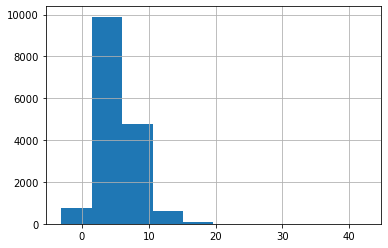

In [27]:
mdf['rate_year']

In [74]:
df = pd.melt(df, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'], var_name='time')
df['time'] = pd.to_datetime(df['time'], infer_datetime_format=True)
df.set_index(df['time'], inplace=True)
df.drop('time', axis=1, inplace=True)

In [47]:
df.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName', 'CountyName' ], inplace= True, axis =1)


In [75]:
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,value
time,,,,,,,,,,
2000-01-31,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,329121.0
2000-01-31,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,311929.0
2000-01-31,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,500887.0
2000-01-31,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,225325.0
2000-01-31,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,405926.0
...,...,...,...,...,...,...,...,...,...,...
2021-08-31,66169,34430,20052,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,1443140.0
2021-08-31,89666,34430,72630,Zip,AR,AR,Diamond City,Harrison,Boone County,118818.0
2021-08-31,62532,34430,12345,Zip,OR,OR,Central Point,Medford,Jackson County,169411.0


In [50]:
df['ZipCode']=df['RegionName']
df.drop('RegionName', inplace=True, axis =1)
df

,State,City,Metro,value,ZipCode
time,,,,,
2000-01-31,NY,New York,New York-Newark-Jersey City,329121.0,10025
2000-01-31,IL,Chicago,Chicago-Naperville-Elgin,311929.0,60657
2000-01-31,NY,New York,New York-Newark-Jersey City,500887.0,10023
2000-01-31,TX,Katy,Houston-The Woodlands-Sugar Land,225325.0,77494
2000-01-31,IL,Chicago,Chicago-Naperville-Elgin,405926.0,60614
...,...,...,...,...,...
2021-08-31,DC,Washington,Washington-Arlington-Alexandria,1443140.0,20052
2021-08-31,AR,Diamond City,Harrison,118818.0,72630
2021-08-31,OR,Central Point,Medford,169411.0,12345


In [57]:
df.groupby(df['ZipCode']).mean()

,value
ZipCode,
501,91352.681034
602,105140.275862
693,81876.050000
705,111372.396552
734,274782.706897
...,...
99714,151976.984925
99801,348817.616162
99824,259471.656566


# Step 3: EDA and Visualization

In [44]:
import matplotlib.pyplot as plt
import matplotlib


In [45]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [46]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})




In [47]:
df =melt_data(df)

In [48]:
df

,value
time,
2000-01-31,147279.169095
2000-02-29,147524.928720
2000-03-31,147960.250126
2000-04-30,149019.600932
2000-05-31,150032.865932
...,...
2021-04-30,255439.475900
2021-05-31,258968.927729
2021-06-30,263308.612333


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


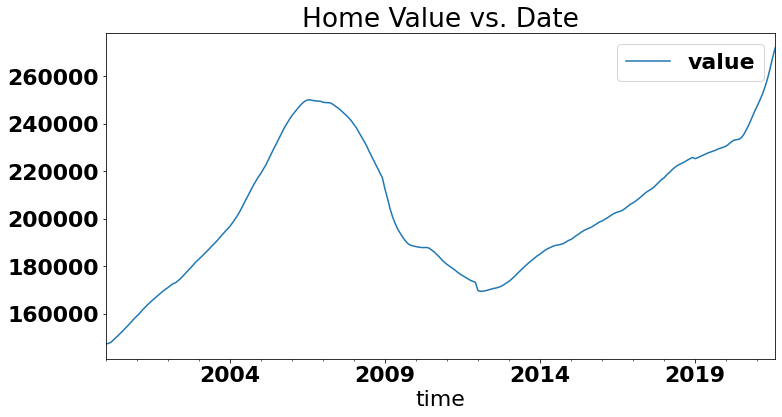

In [49]:
df.plot(figsize=(12,6))
plt.title('Home Value vs. Date');

Clean the data

Dickey Fuller test

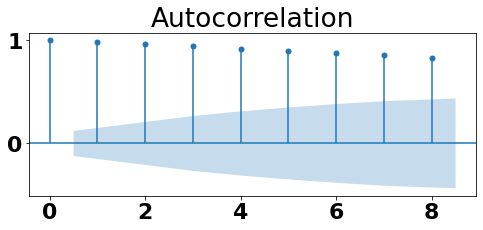

In [51]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(df,ax=ax, lags=8);


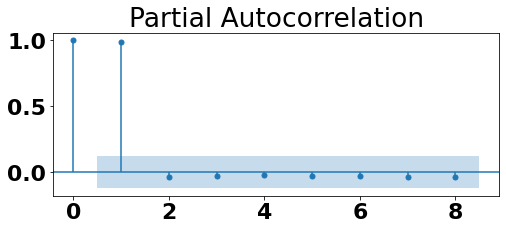

In [53]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(df,ax=ax, lags=8);

In [54]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA

# Fit an ARMA(1,0) model
mod_arma = ARMA(df, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  260
Model:                     ARMA(1, 0)   Log Likelihood               -2253.651
Method:                       css-mle   S.D. of innovations           1386.288
Date:                Sun, 03 Oct 2021   AIC                           4513.301
Time:                        17:38:46   BIC                           4523.983
Sample:                    01-31-2000   HQIC                          4517.596
                         - 08-31-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.034e+05   6.08e+04      3.347      0.001    8.43e+04    3.22e+05
ar.L1.value     0.9997      0.000   2736.325      0.000       0.999       1.000
                                    Roots       

/Users/avijames/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/avijames/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency i

In [55]:
# Fit an ARMA(2,1) model
mod_arma = ARMA(df, order=(2,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

/Users/avijames/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/avijames/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency i

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  260
Model:                     ARMA(2, 1)   Log Likelihood               -1927.617
Method:                       css-mle   S.D. of innovations            390.390
Date:                Sun, 03 Oct 2021   AIC                           3865.235
Time:                        17:46:11   BIC                           3883.038
Sample:                    01-31-2000   HQIC                          3872.392
                         - 08-31-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.034e+05   2.52e+04      8.067      0.000    1.54e+05    2.53e+05
ar.L1.value     1.9910      0.007    277.406      0.000       1.977       2.005
ar.L2.value    -0.9919      0.007   -136.260    

/Users/avijames/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
# Fit an ARMA(2,2) model
mod_arma = ARMA(df, order=(2,2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  260
Model:                     ARMA(2, 2)   Log Likelihood               -1927.147
Method:                       css-mle   S.D. of innovations            389.992
Date:                Sun, 03 Oct 2021   AIC                           3866.295
Time:                        17:46:48   BIC                           3887.659
Sample:                    01-31-2000   HQIC                          3874.884
                         - 08-31-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.034e+05   2.65e+04      7.679      0.000    1.51e+05    2.55e+05
ar.L1.value     1.9878      0.010    208.695      0.000       1.969       2.007
ar.L2.value    -0.9887      0.010   -102.258    

/Users/avijames/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/avijames/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency i

In [58]:
roll_mean = df.rolling(window=12, center=False).mean()
roll_std = df.rolling(window=12, center=False).std()

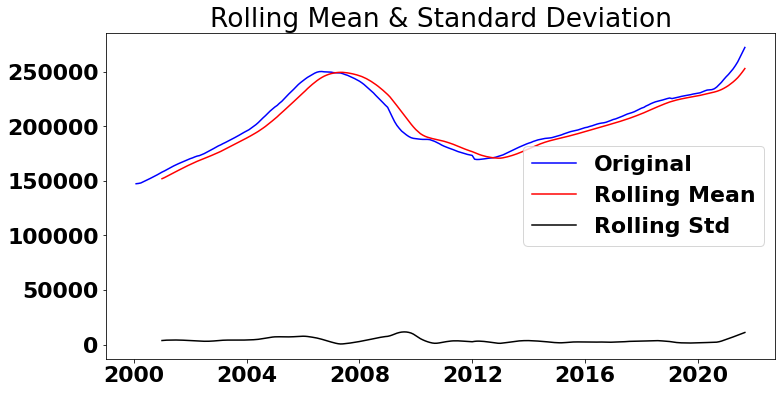

In [60]:
# Plot rolling statistics
fig = plt.figure(figsize=(12,6))
plt.plot(df, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [62]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test: \n')
dftest = adfuller(df['value'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                  -1.147138
p-value                          0.695913
#Lags Used                       2.000000
Number of Observations Used    257.000000
Critical Value (1%)             -3.456054
Critical Value (5%)             -2.872853
Critical Value (10%)            -2.572799
dtype: float64


# Step 5: ARIMA Modeling

# Step 6: Interpreting Results